# _**Exploratory Data Analysis**_
---

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys, os
try:
    from src.utils import save_plot 
except:
    sys.path.append('../src')
    from utils import save_plot
# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set_color_codes()
sns.set_theme(style='whitegrid', context='notebook')

#plot presets
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'

In [6]:
data_path = r'E:\\BCGX\\data\\raw'
client_df = pd.read_csv(os.path.join(data_path,'client_data.csv'))
price_df = pd.read_csv(os.path.join(data_path, 'price_data.csv'))

In [7]:
client_df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


In [8]:
price_df.head(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


---

## Descriptive statistics of data



In [9]:
client_df.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [10]:
price_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 34.6 MB


In [11]:
for col in client_df.columns:
    if col.startswith('date'):
        client_df[col] = pd.to_datetime(client_df[col], errors= 'coerce')

client_df[client_df.select_dtypes('object').columns] = client_df[client_df.select_dtypes('object').columns].astype('str')

### Statistics



In [12]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,...,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606,14606,14606,14606,14606.000000,14606.000000,14606.000000,...,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,2011-01-28 07:54:18.879912448,2016-07-27 20:48:26.422018560,2013-01-02 12:29:10.951663872,2015-07-21 06:59:00.353279488,1868.614880,1399.762906,0.966726,...,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
min,0.000000e+00,0.000000e+00,0.000000,2003-05-09 00:00:00,2016-01-28 00:00:00,2003-05-09 00:00:00,2013-06-26 00:00:00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,2010-01-15 00:00:00,2016-04-27 06:00:00,2010-08-12 00:00:00,2015-04-17 00:00:00,494.995000,0.000000,0.000000,...,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,2011-03-04 00:00:00,2016-08-01 00:00:00,2013-06-19 00:00:00,2015-07-27 00:00:00,1112.875000,314.000000,0.000000,...,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2012-04-19 00:00:00,2016-10-31 00:00:00,2015-06-16 00:00:00,2015-10-29 00:00:00,2401.790000,1745.750000,0.000000,...,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,2014-09-01 00:00:00,2017-06-13 00:00:00,2016-01-29 00:00:00,2016-01-28 00:00:00,82902.830000,175375.000000,30.000000,...,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000
std,5.734653e+05,1.629731e+05,64364.196422,NaN,NaN,NaN,NaN,2387.571531,3247.786255,5.108289,...,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175


In [13]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


---

## Data visualization


In [23]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right", save: bool = False):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    if save:
        save_plot()
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )


def plot_distribution(dataframe, column, ax, bins_=50, save: bool = True):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')
    if save:
        save_plot()
    

Thhe first function `plot_stacked_bars` is used to plot a stacked bar chart. An example of how you could use this is shown below:

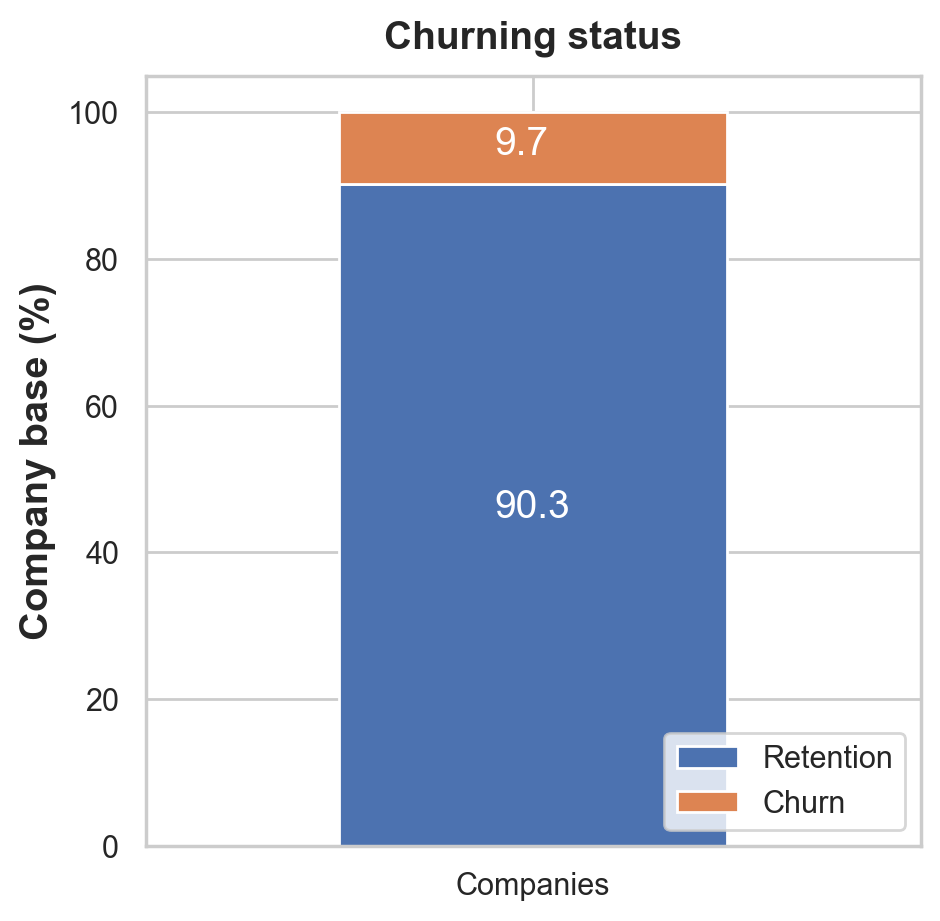

In [15]:
churn = client_df[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

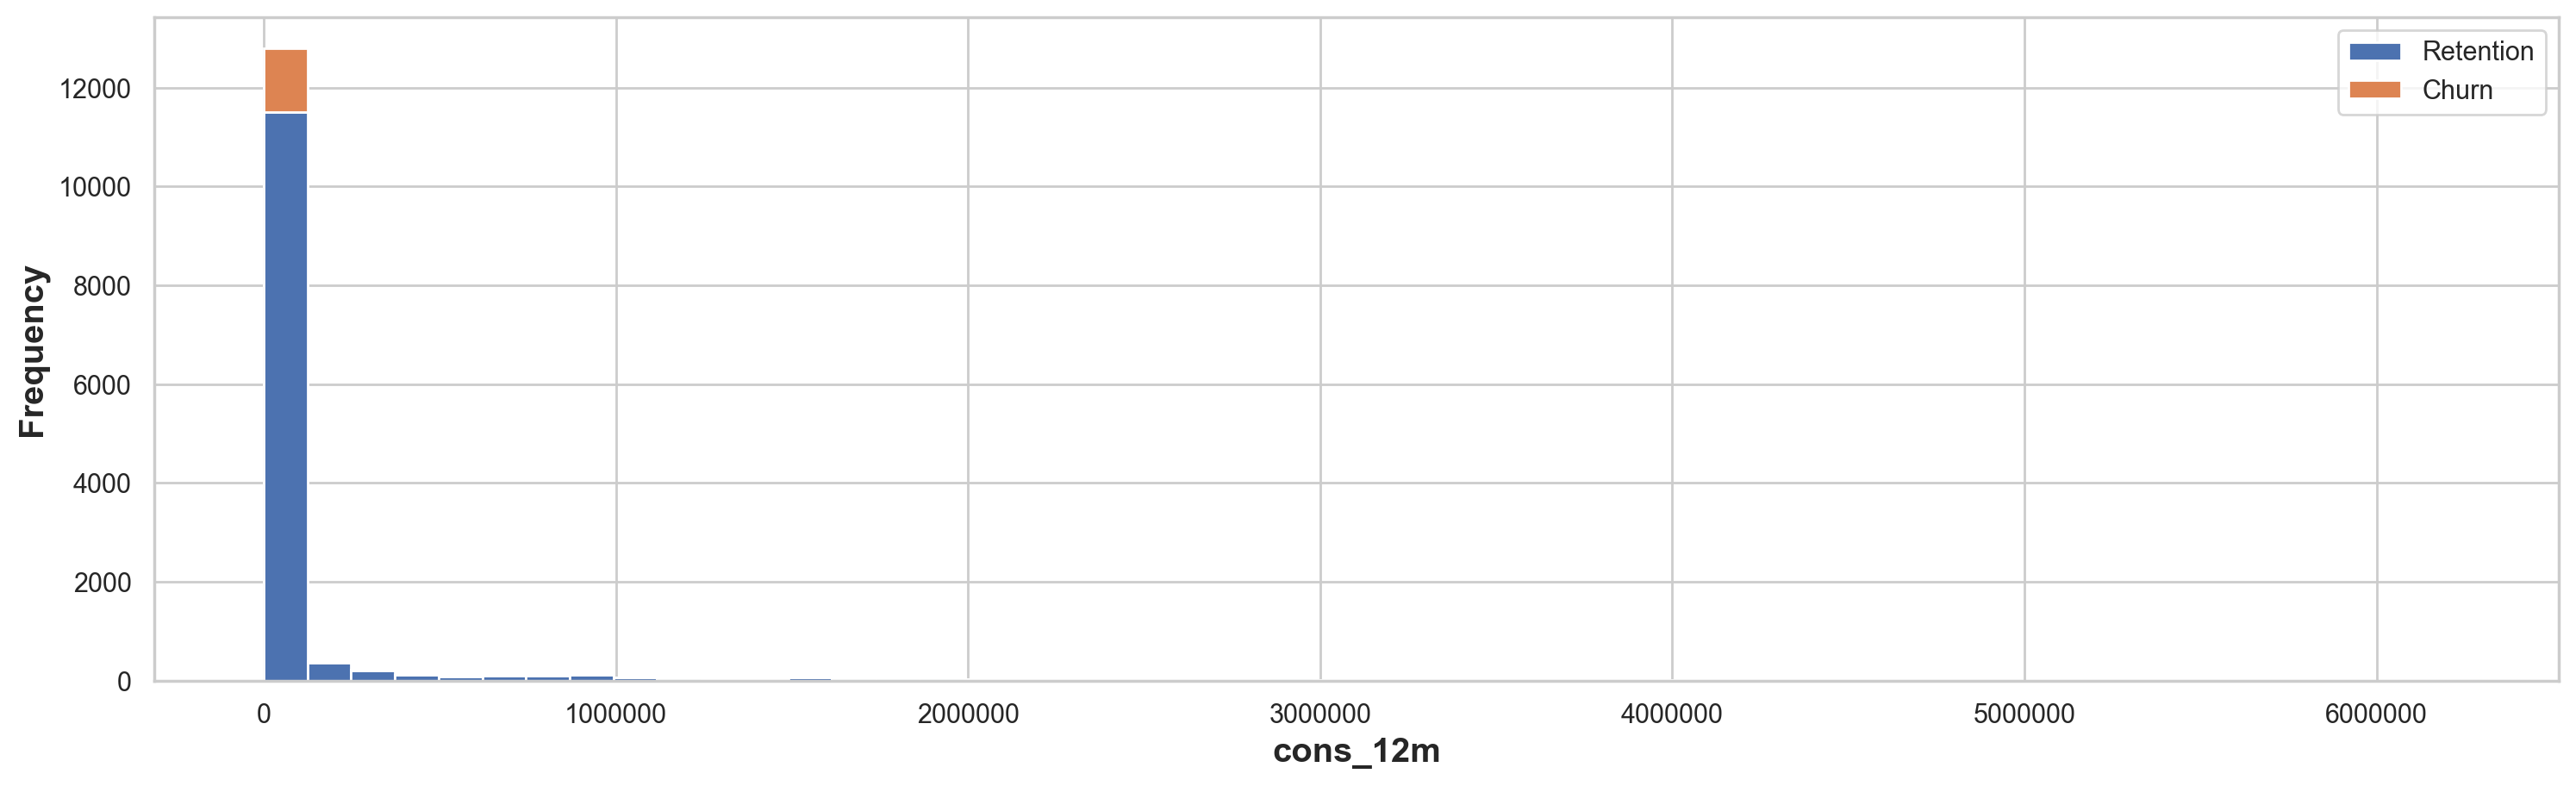

In [16]:
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

fig, axs = plt.subplots(nrows=1, figsize=(18, 5))

plot_distribution(consumption, 'cons_12m', axs)

### Sales channel

In [17]:
channel = client_df[['id', 'channel_sales', 'churn']]
channel = channel.groupby(['channel_sales', 'churn']).count()
channel

id
channel_sales                    churn      
MISSING                          0      3442
                                 1       283
epumfxlbckeskwekxbiuasklxalciiuu 0         3
ewpakwlliwisiwduibdlfmalxowmwpci 0       818
                                 1        75
fixdbufsefwooaasfcxdxadsiekoceaa 0         2
foosdfpfkusacimwkcsosbicdxkicaua 0      5934
                                 1       820
lmkebamcaaclubfxadlmueccxoimlema 0      1740
                                 1       103
sddiedcslfslkckwlfkdpoeeailfpeds 0        11
usilxuppasemubllopkaafesmlibmsdf 0      1237
                                 1       138

In [18]:
channel = channel.unstack(level = 1)
channel = channel.fillna(0)
channel

id       
churn                                  0      1
channel_sales                                  
MISSING                           3442.0  283.0
epumfxlbckeskwekxbiuasklxalciiuu     3.0    0.0
ewpakwlliwisiwduibdlfmalxowmwpci   818.0   75.0
fixdbufsefwooaasfcxdxadsiekoceaa     2.0    0.0
foosdfpfkusacimwkcsosbicdxkicaua  5934.0  820.0
lmkebamcaaclubfxadlmueccxoimlema  1740.0  103.0
sddiedcslfslkckwlfkdpoeeailfpeds    11.0    0.0
usilxuppasemubllopkaafesmlibmsdf  1237.0  138.0

In [19]:
channel.div(channel.sum(axis=1), axis=0) * 100

id           
churn                                      0          1
channel_sales                                          
MISSING                            92.402685   7.597315
epumfxlbckeskwekxbiuasklxalciiuu  100.000000   0.000000
ewpakwlliwisiwduibdlfmalxowmwpci   91.601344   8.398656
fixdbufsefwooaasfcxdxadsiekoceaa  100.000000   0.000000
foosdfpfkusacimwkcsosbicdxkicaua   87.859046  12.140954
lmkebamcaaclubfxadlmueccxoimlema   94.411286   5.588714
sddiedcslfslkckwlfkdpoeeailfpeds  100.000000   0.000000
usilxuppasemubllopkaafesmlibmsdf   89.963636  10.036364

In [21]:
channel = client_df[['id', 'channel_sales', 'churn']]
channel = channel.groupby(['channel_sales', 'churn'])['id'].count().unstack(level=1).fillna(0)
channel_churn = (channel.div(channel.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)


Plot saved at: visuals\output_3.png


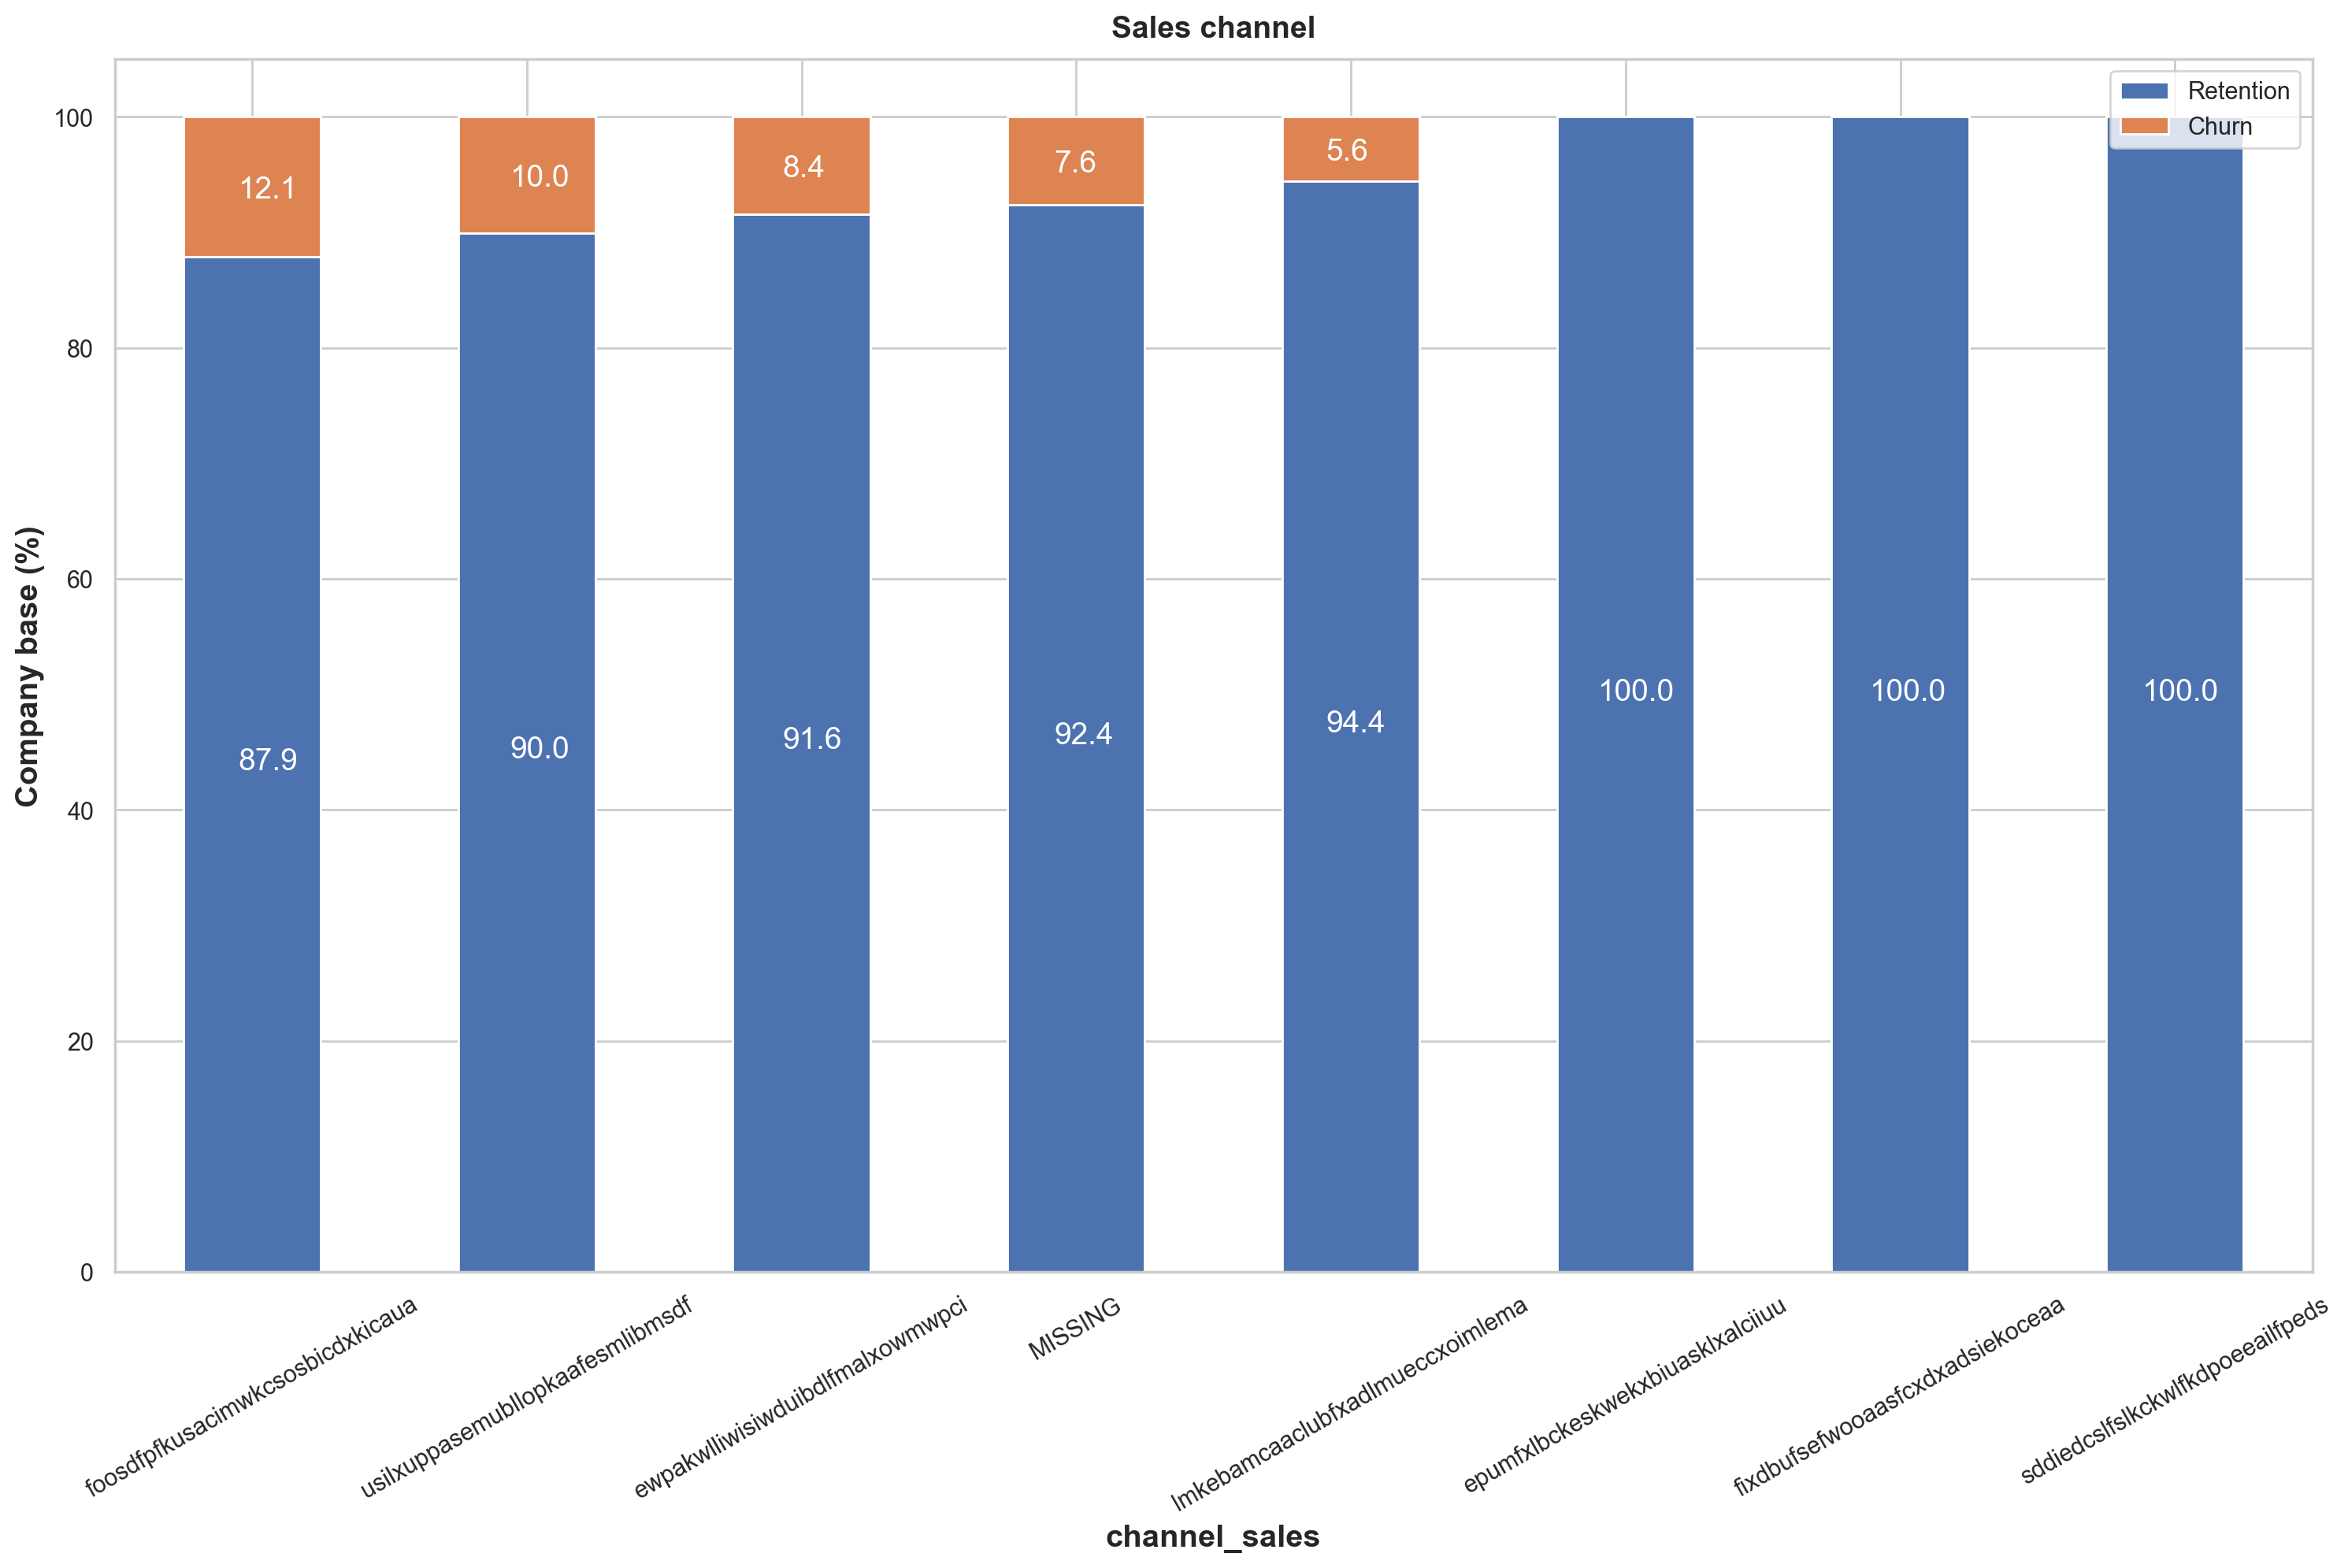

In [25]:
plot_stacked_bars(channel_churn, 'Sales channel', rot_=30, save = True)


Interestingly, the churning customers are distributed over 5 different values for `channel_sales`. As well as this, the value of `MISSING` has a churn rate of 7.6%. `MISSING` indicates a missing value and was added by the team when they were cleaning the dataset. This feature could be an important feature when it comes to building our model.

### Consumption

Let's see the distribution of the consumption in the last year and month. Since the consumption data is univariate, let's use histograms to visualize their distribution.

In [ ]:
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

In [ ]:
def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distribution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

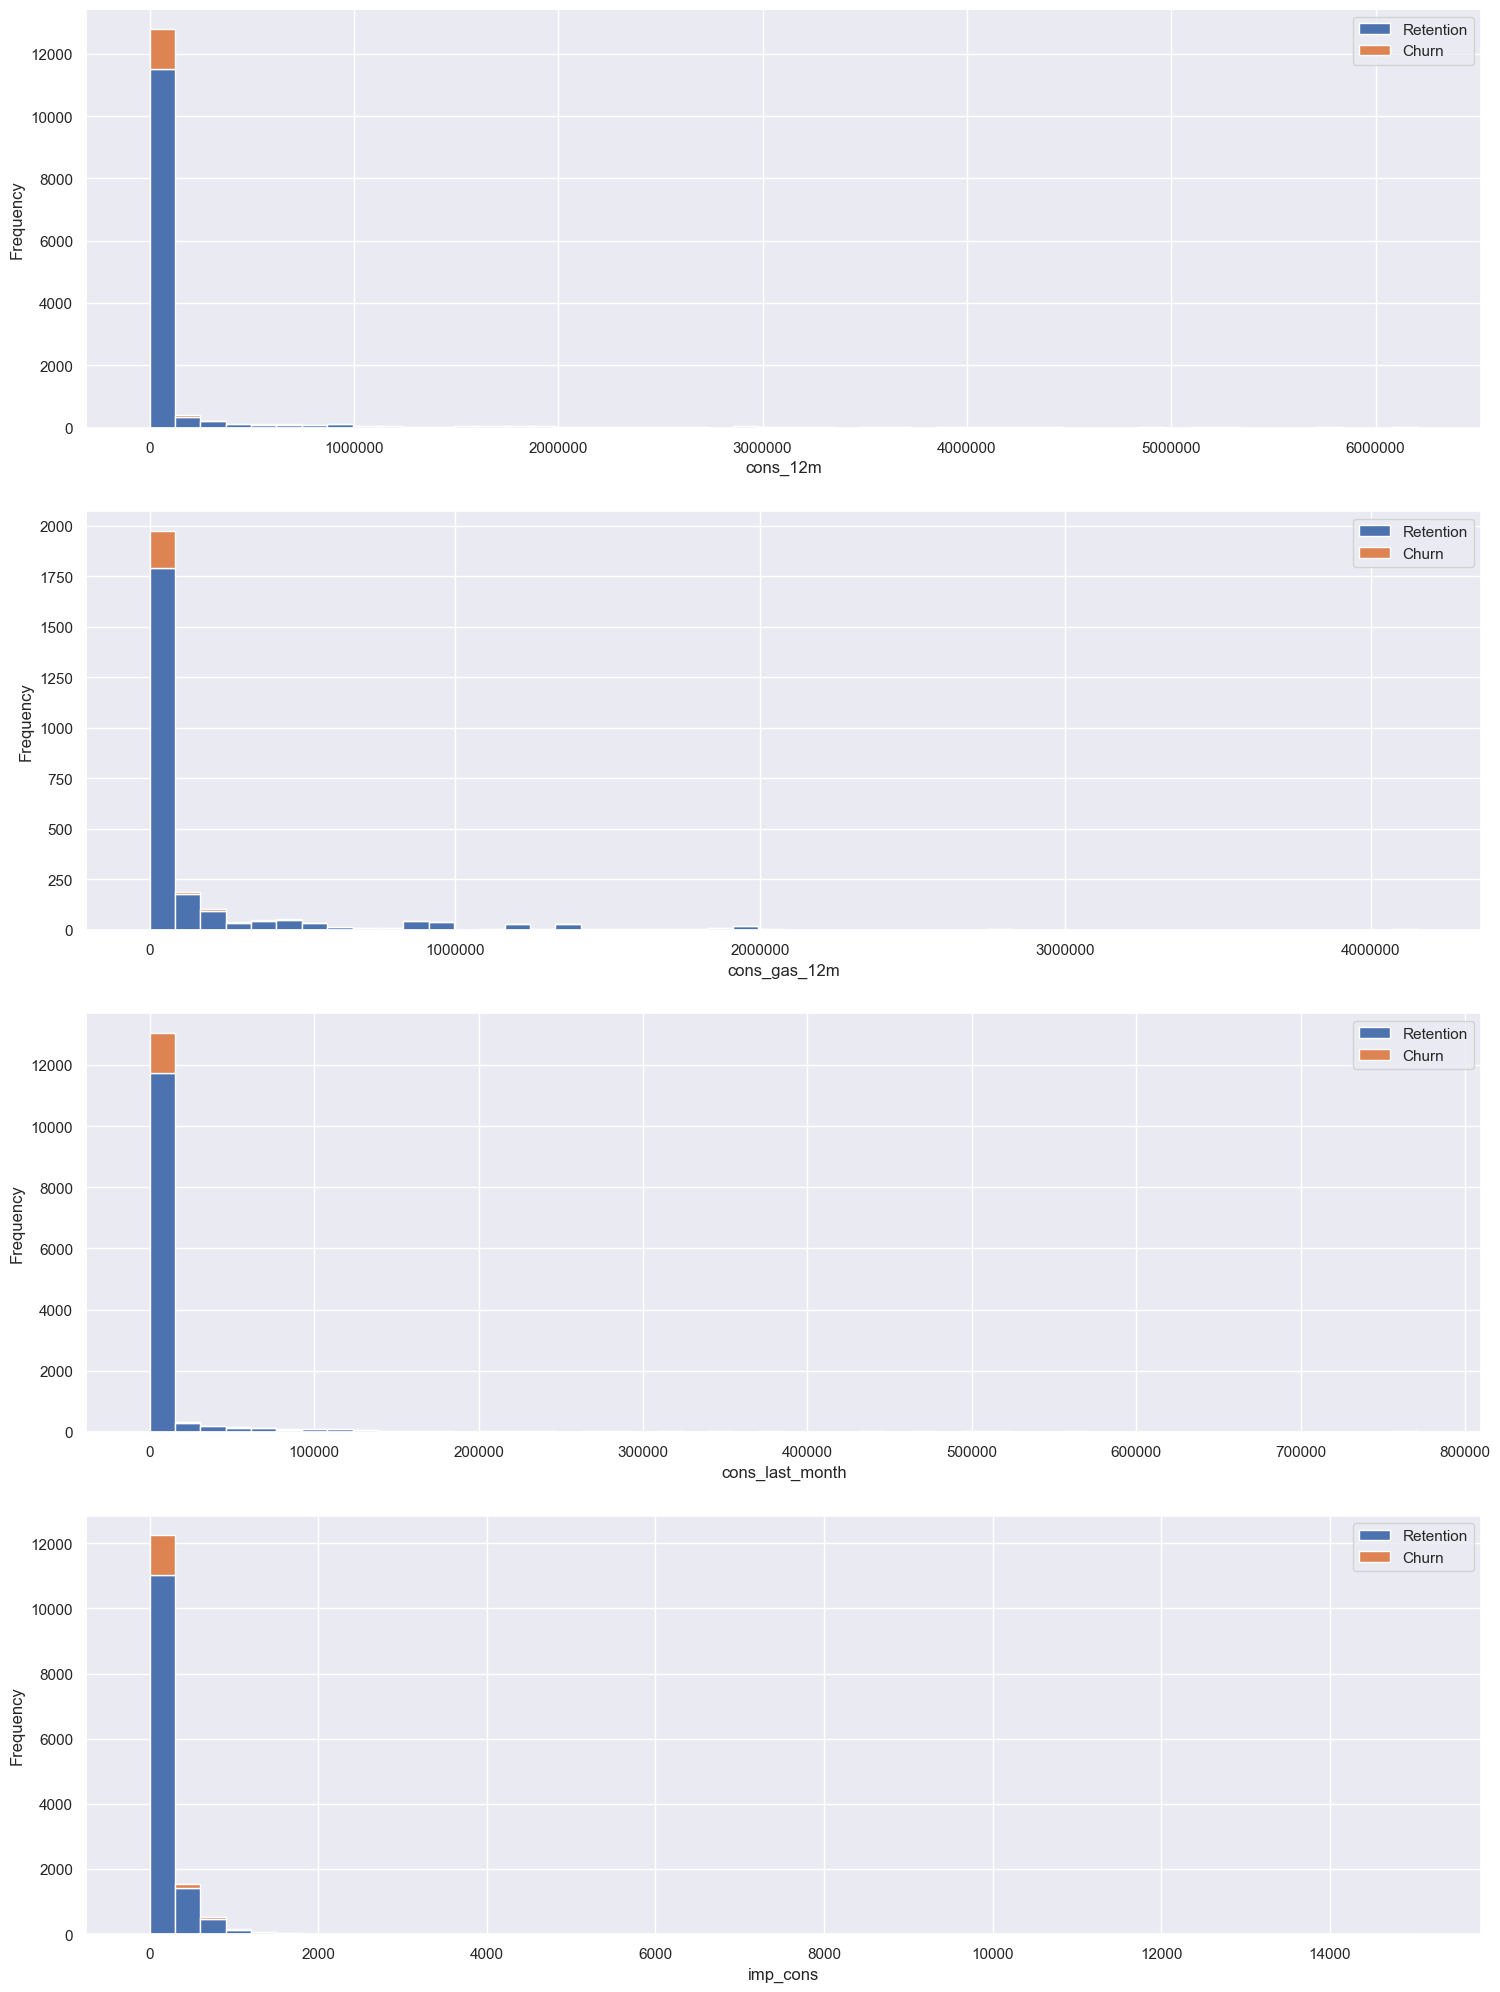

In [ ]:
fig, axs = plt.subplots(nrows=4, figsize=(18, 25))

plot_distribution(consumption, 'cons_12m', axs[0])
plot_distribution(consumption[consumption['has_gas'] == 't'], 'cons_gas_12m', axs[1])
plot_distribution(consumption, 'cons_last_month', axs[2])
plot_distribution(consumption, 'imp_cons', axs[3])

Clearly, the consumption data is highly positively skewed, presenting a very long right-tail towards the higher values of the distribution. The values on the higher and lower end of the distribution are likely to be outliers. We can use a standard plot to visualise the outliers in more detail. A boxplot is a standardized way of displaying the distribution based on a five number summary:
- Minimum
- First quartile (Q1)
- Median
- Third quartile (Q3)
- Maximum

It can reveal outliers and what their values are. It can also tell us if our data is symmetrical, how tightly our data is grouped and if/how our data is skewed.

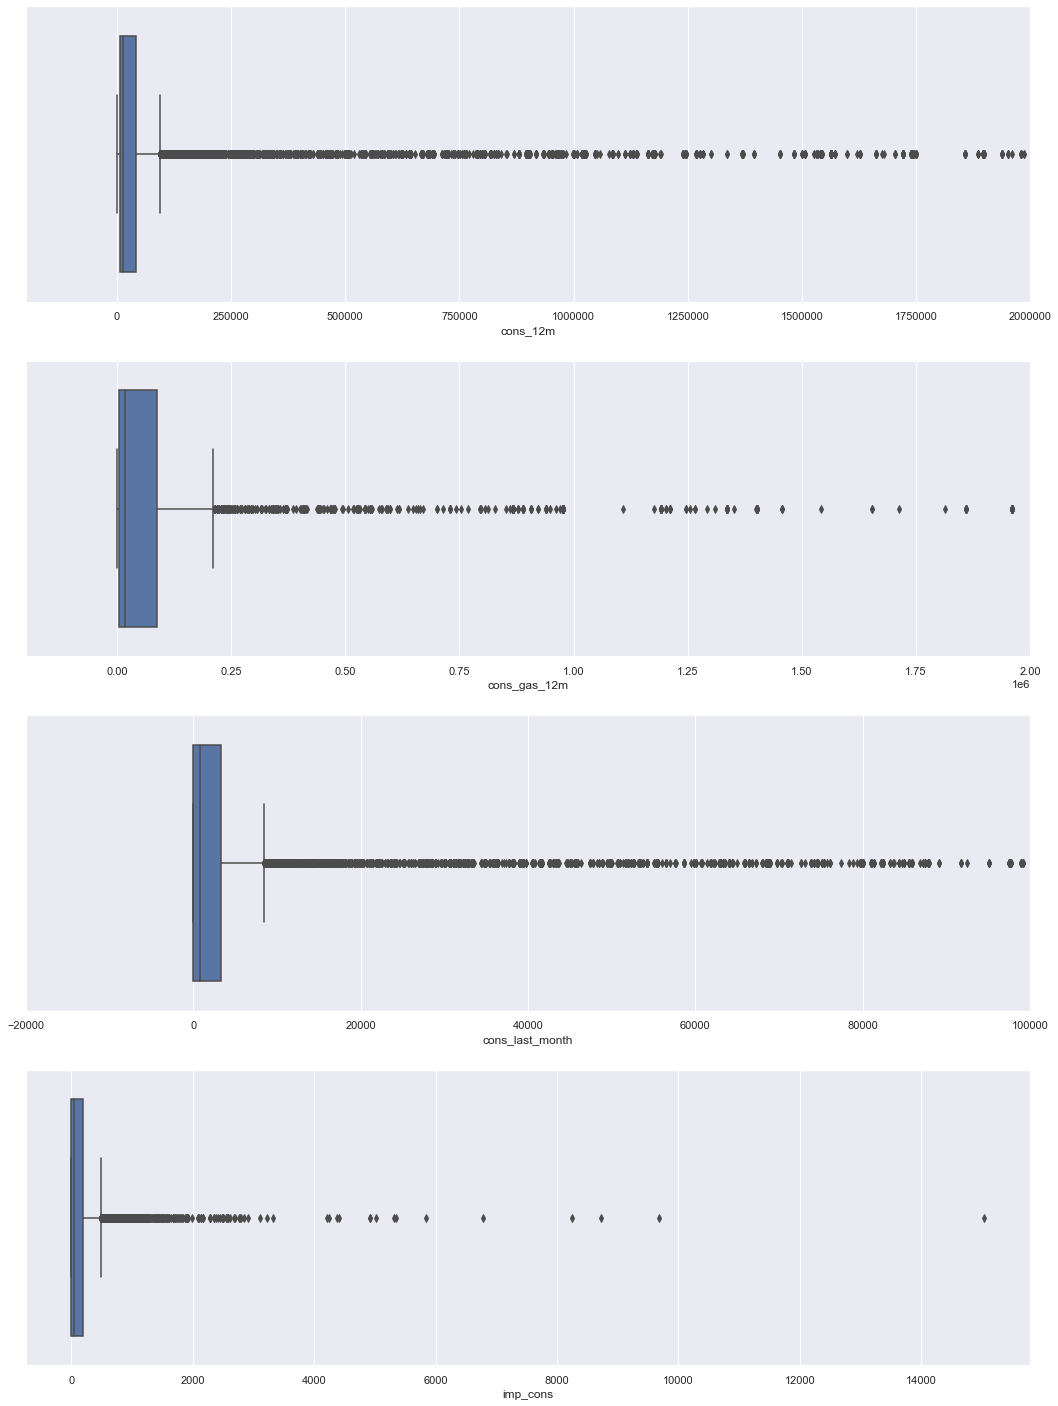

In [ ]:
fig, axs = plt.subplots(nrows=4, figsize=(18,25))

# Plot histogram
sns.boxplot(consumption["cons_12m"], ax=axs[0])
sns.boxplot(consumption[consumption["has_gas"] == "t"]["cons_gas_12m"], ax=axs[1])
sns.boxplot(consumption["cons_last_month"], ax=axs[2])
sns.boxplot(consumption["imp_cons"], ax=axs[3])

# Remove scientific notation
for ax in axs:
    ax.ticklabel_format(style='plain', axis='x')
    # Set x-axis limit
    axs[0].set_xlim(-200000, 2000000)
    axs[1].set_xlim(-200000, 2000000)
    axs[2].set_xlim(-20000, 100000)
    plt.show()

We will deal with skewness and outliers during feature engineering in the next exercise.

### Forecast

In [ ]:
forecast = client_df[
    ["id", "forecast_cons_12m",
    "forecast_cons_year","forecast_discount_energy","forecast_meter_rent_12m",
    "forecast_price_energy_off_peak","forecast_price_energy_peak",
    "forecast_price_pow_off_peak","churn"
    ]
]

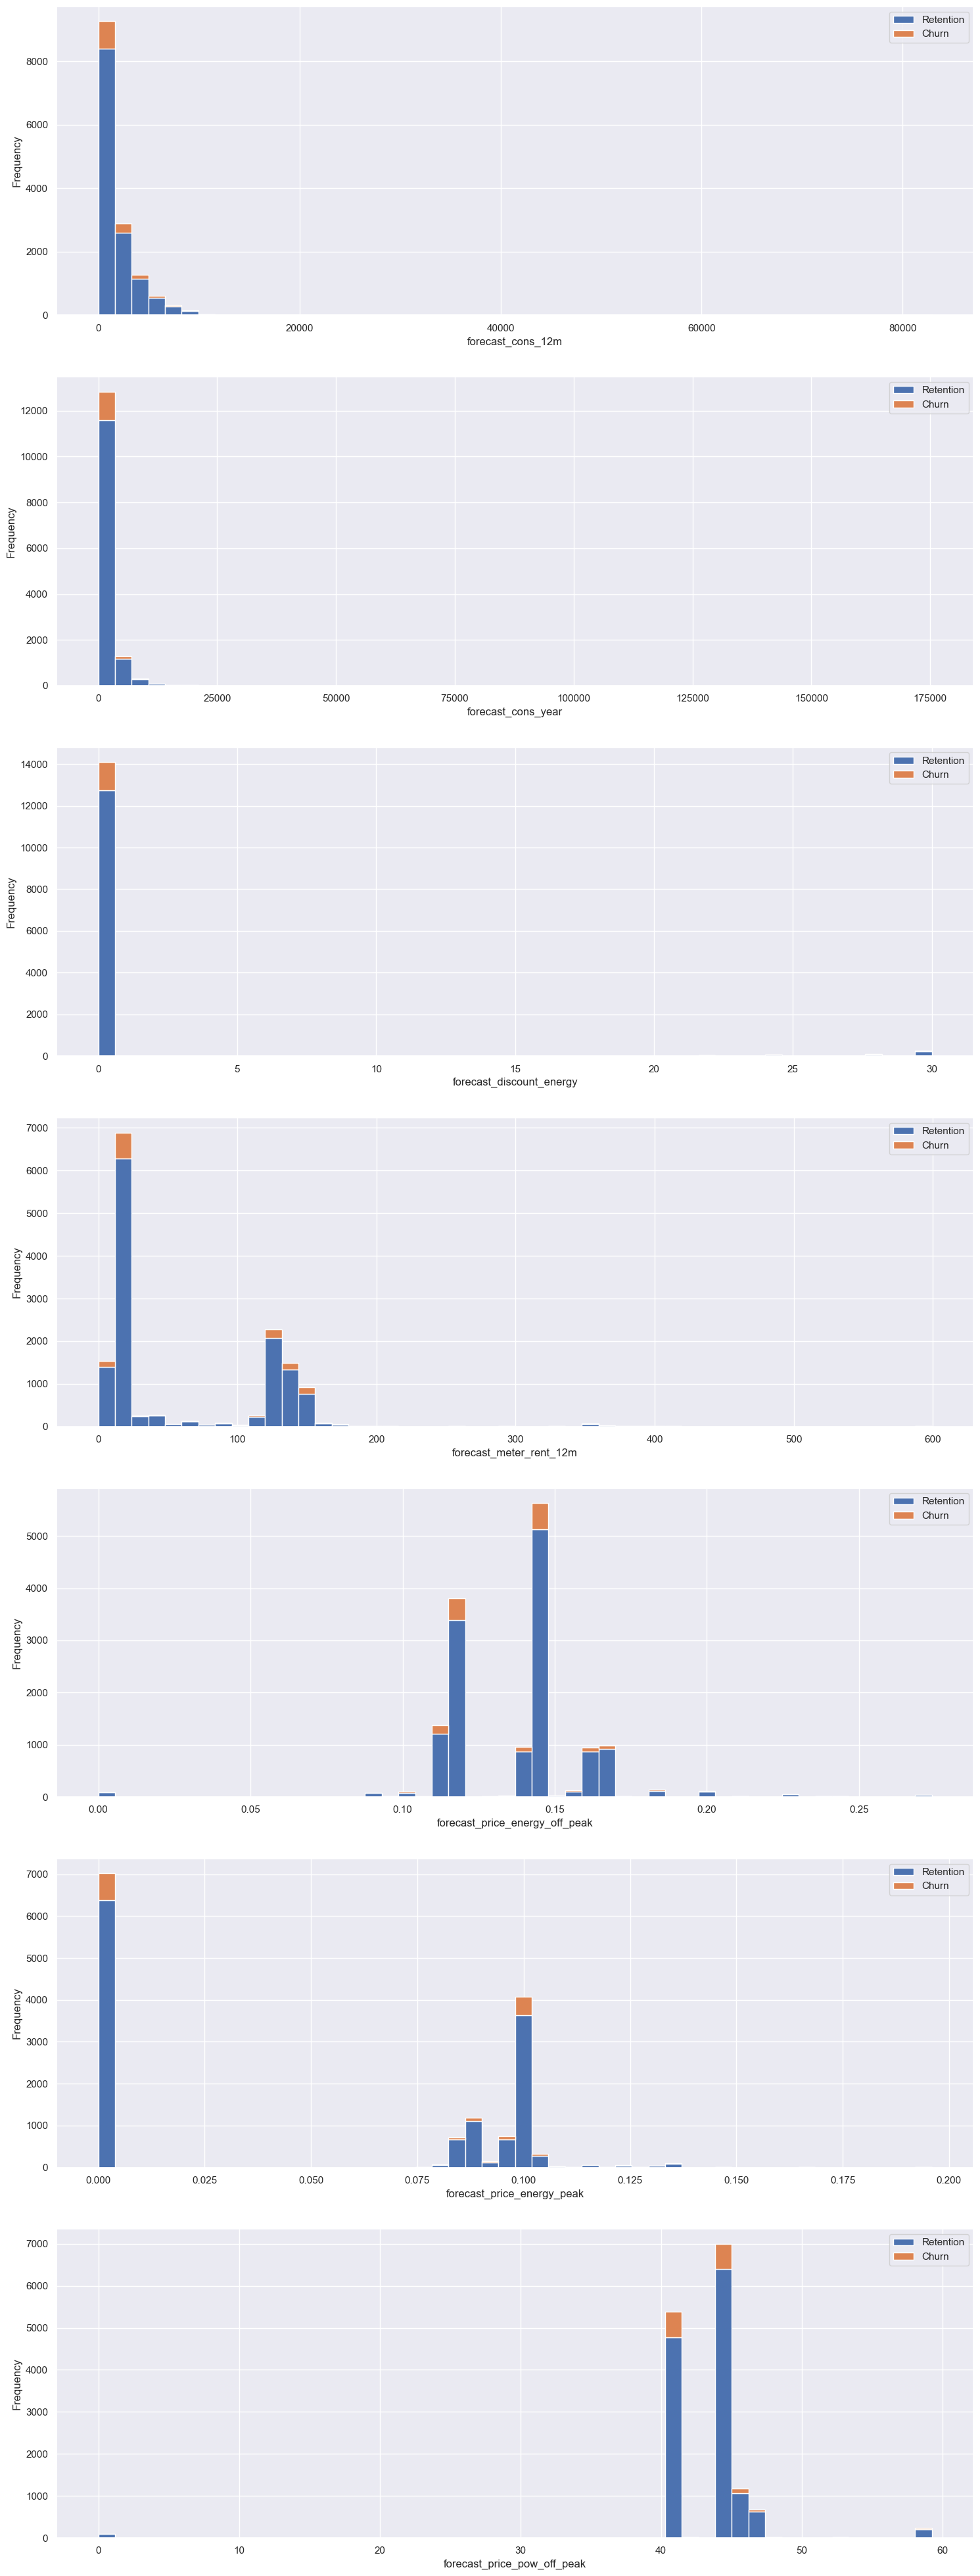

In [ ]:
fig, axs = plt.subplots(nrows=7, figsize=(18,50))

# Plot histogram
plot_distribution(client_df, "forecast_cons_12m", axs[0])
plot_distribution(client_df, "forecast_cons_year", axs[1])
plot_distribution(client_df, "forecast_discount_energy", axs[2])
plot_distribution(client_df, "forecast_meter_rent_12m", axs[3])
plot_distribution(client_df, "forecast_price_energy_off_peak", axs[4])
plot_distribution(client_df, "forecast_price_energy_peak", axs[5])
plot_distribution(client_df, "forecast_price_pow_off_peak", axs[6])

Similarly to the consumption plots, we can observe that a lot of the variables are highly positively skewed, creating a very long tail for the higher values. We will make some transformations during the next exercise to correct for this skewness.

### Contract type

In [ ]:
contract_type = client_df[['id', 'has_gas', 'churn']]
contract = contract_type.groupby(['churn', 'has_gas'])['id'].count().unstack(level=0)
contract_percentage = (contract.div(contract.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

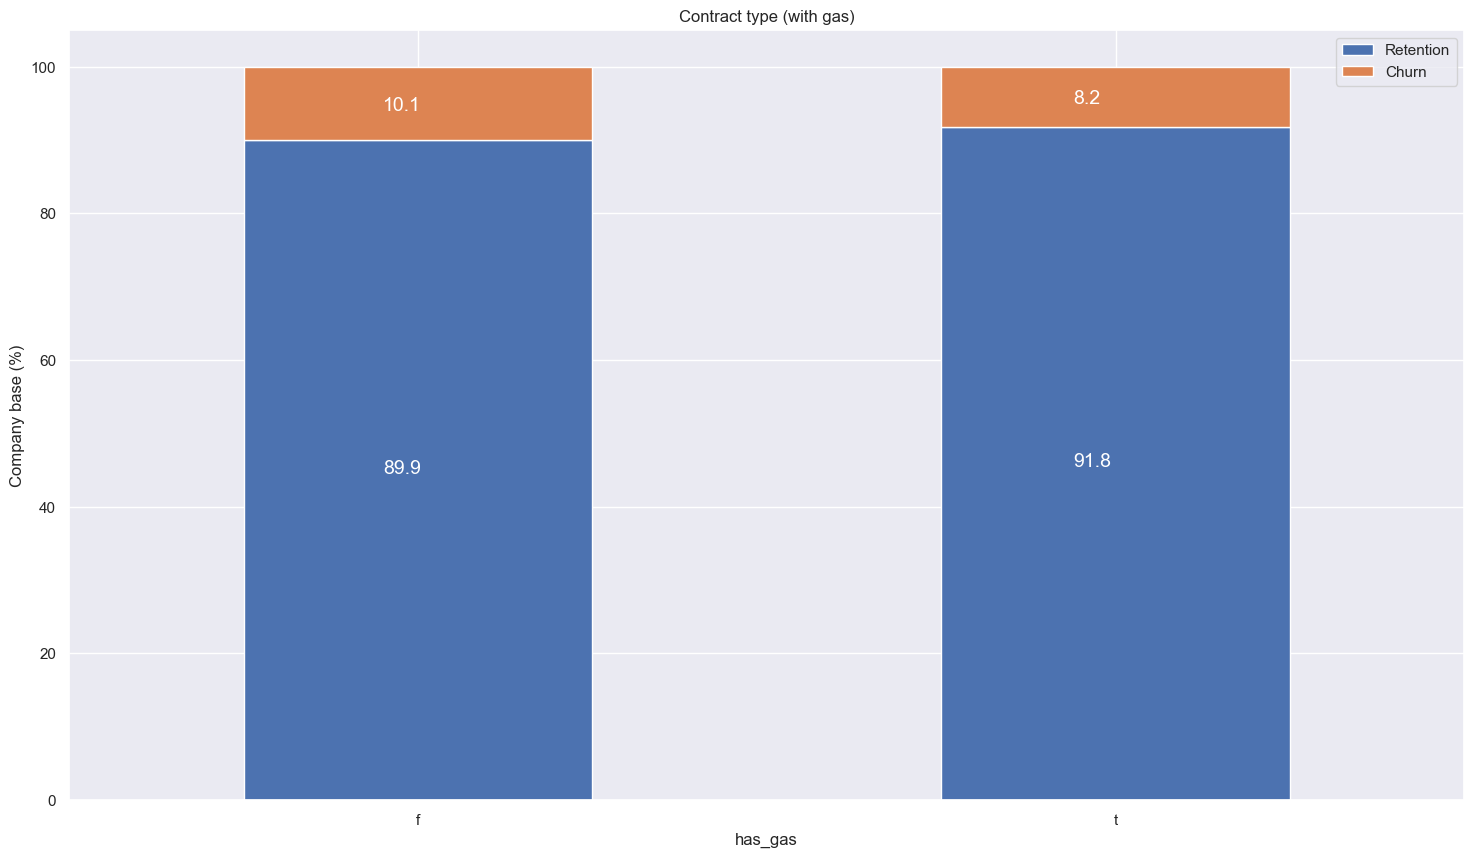

In [ ]:
plot_stacked_bars(contract_percentage, 'Contract type (with gas)')

### Margins

In [ ]:
margin = client_df[['id', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin']]

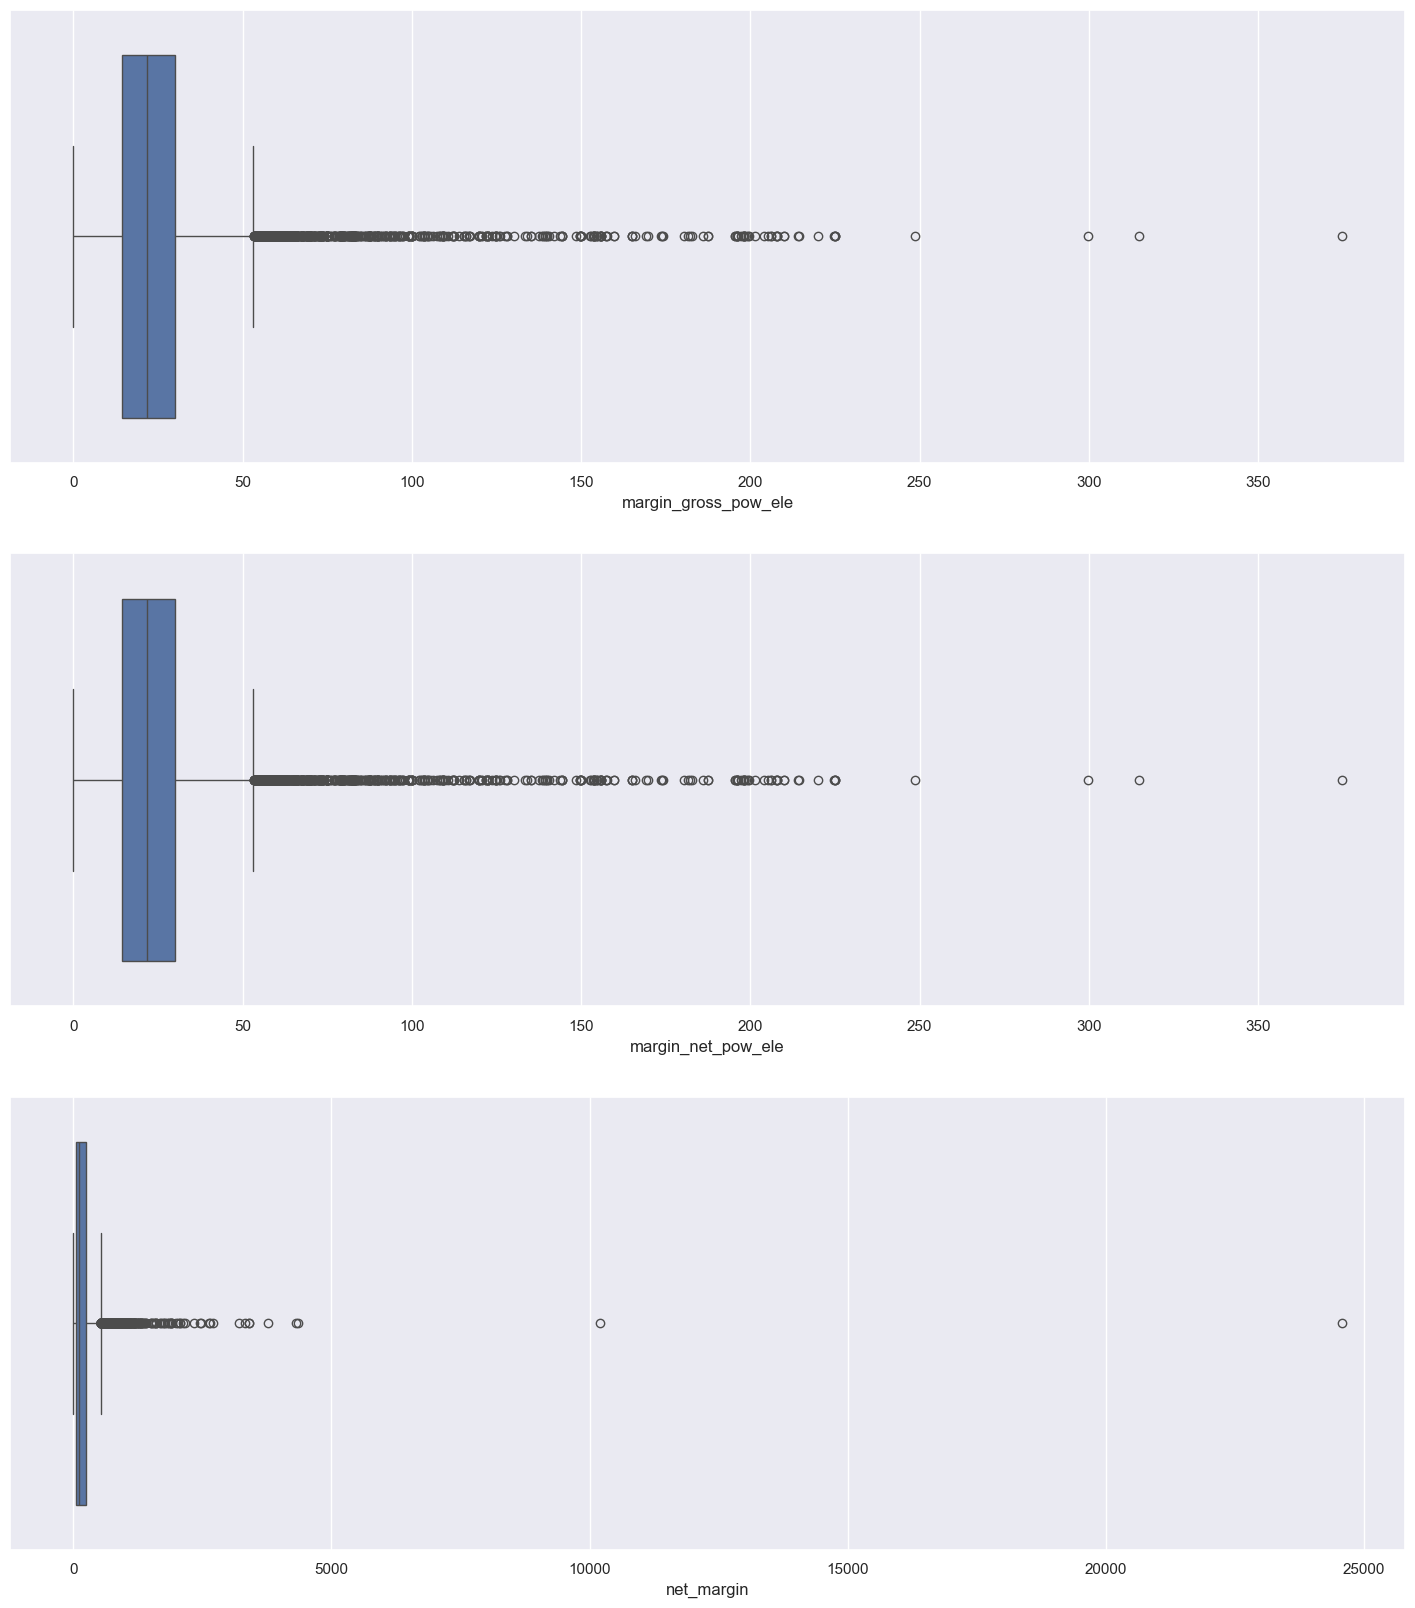

In [ ]:
fig, axs = plt.subplots(nrows=3, figsize=(18,20))
# Plot histogram
sns.boxplot(margin["margin_gross_pow_ele"], ax=axs[0], orient = 'h')
sns.boxplot(margin["margin_net_pow_ele"],ax=axs[1], orient = 'h')
sns.boxplot(margin["net_margin"], ax=axs[2], orient = 'h')
# Remove scientific notation
# axs[0].ticklabel_format(style='plain', axis='x')
# axs[1].ticklabel_format(style='plain', axis='x')
# axs[2].ticklabel_format(style='plain', axis='x')
plt.show()

We can see some outliers here as well which we will deal with in the next exercise.

### Subscribed power

In [ ]:
power = client_df[['id', 'pow_max', 'churn']]

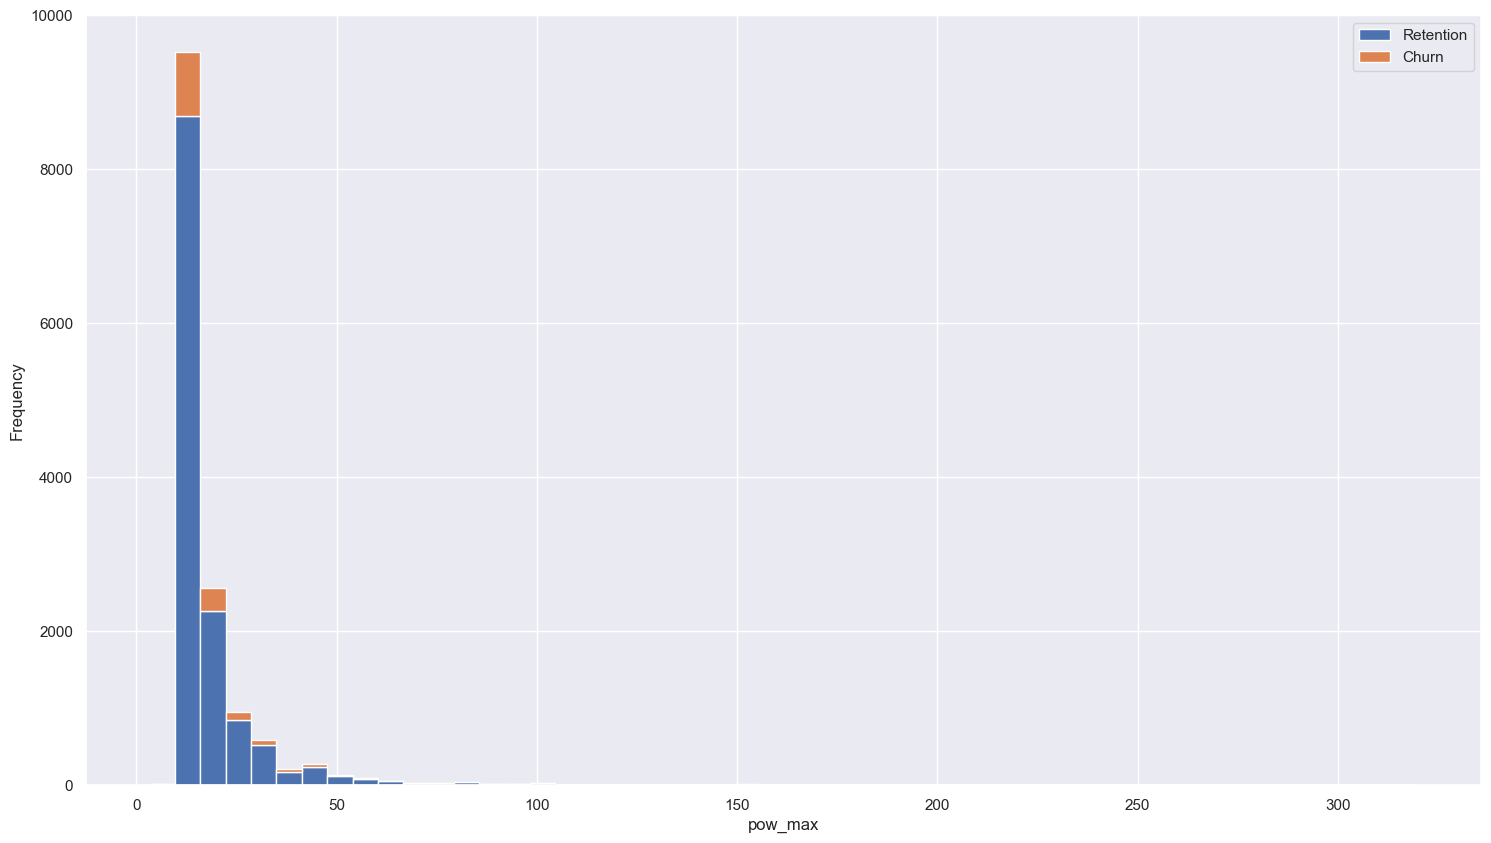

In [ ]:
fig, axs = plt.subplots(nrows=1, figsize=(18, 10))
plot_distribution(power, 'pow_max', axs)

### Other columns

In [ ]:
others = client_df[['id', 'nb_prod_act', 'num_years_antig', 'origin_up', 'churn']]
products = others.groupby([others["nb_prod_act"],others["churn"]])["id"].count().unstack(level=1)
products_percentage = (products.div(products.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)

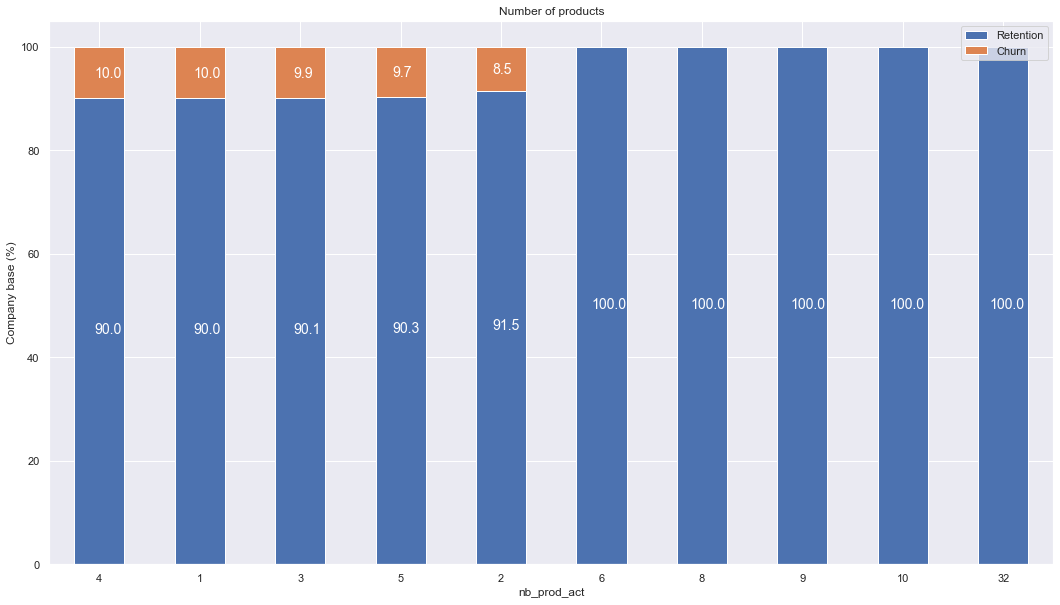

In [ ]:
plot_stacked_bars(products_percentage, "Number of products")

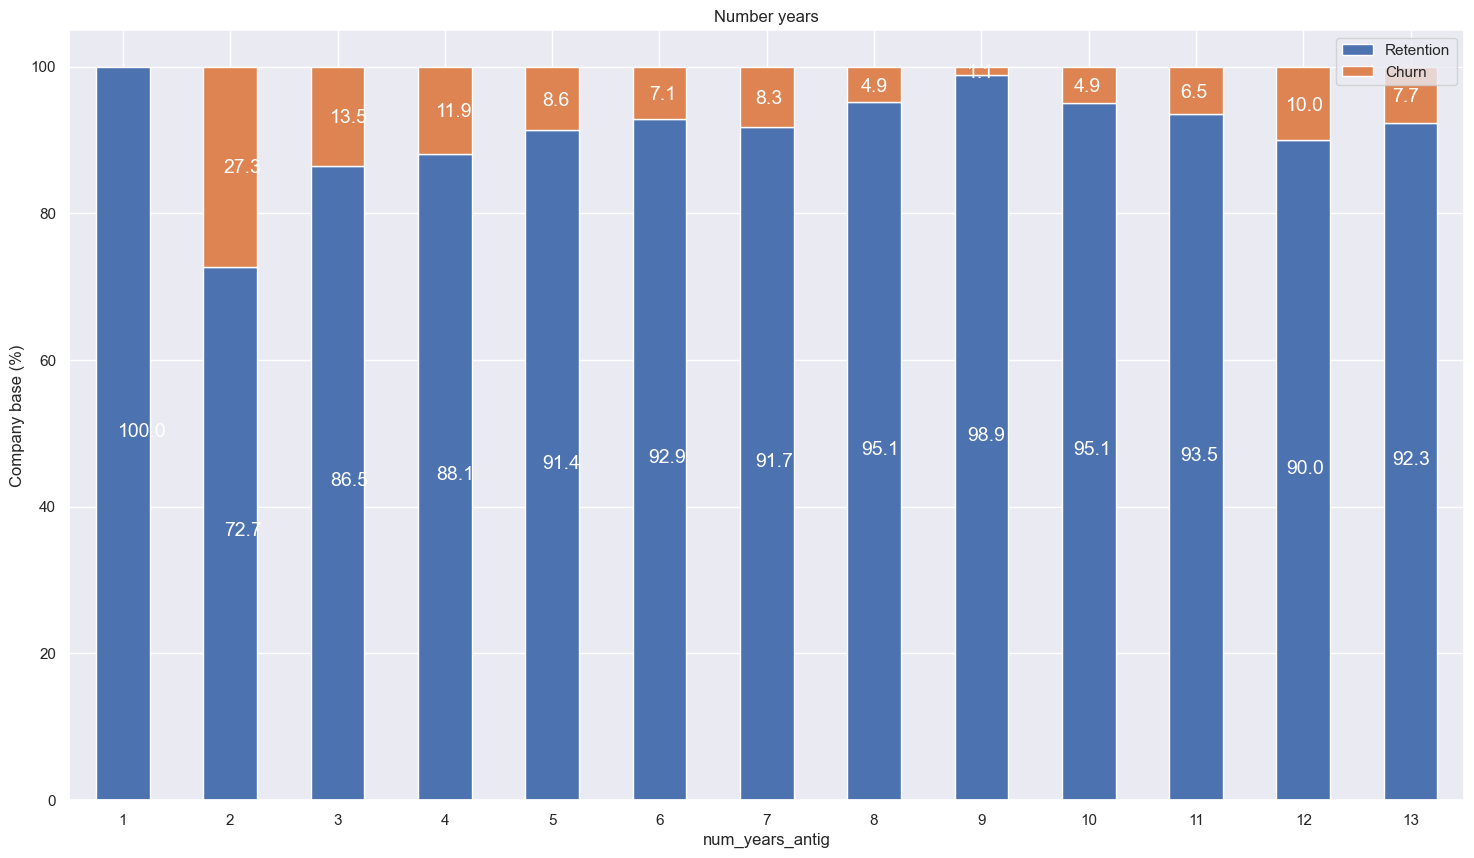

In [ ]:
years_antig = others.groupby([others["num_years_antig"],others["churn"]])["id"].count().unstack(level=1)
years_antig_percentage = (years_antig.div(years_antig.sum(axis=1), axis=0)*100)
plot_stacked_bars(years_antig_percentage, "Number years")

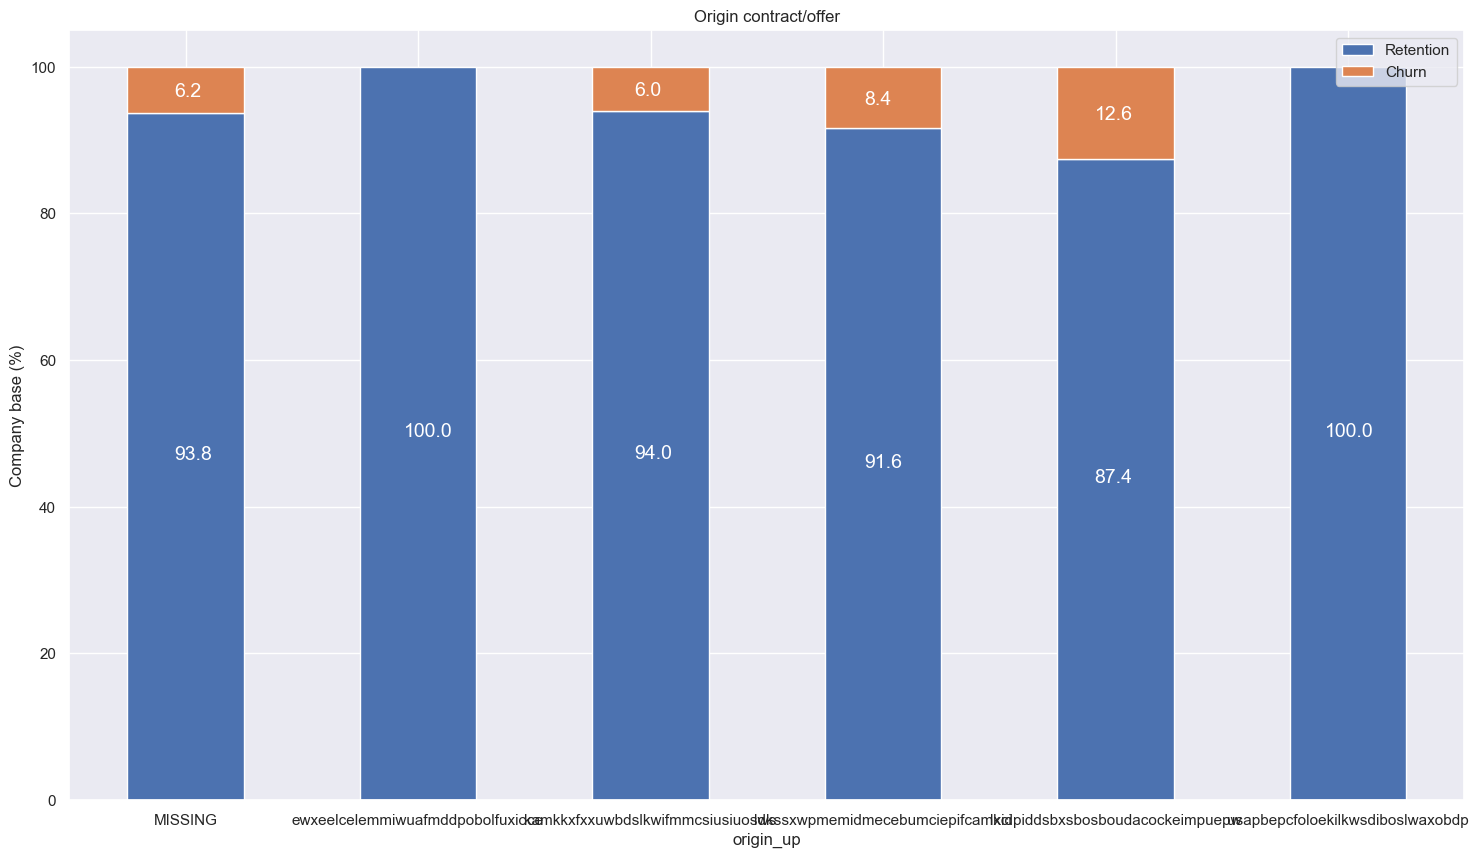

In [ ]:
origin = others.groupby([others["origin_up"],others["churn"]])["id"].count().unstack(level=1)
origin_percentage = (origin.div(origin.sum(axis=1), axis=0)*100)
plot_stacked_bars(origin_percentage, "Origin contract/offer", rot_= 30)


# _**Further Plots**_

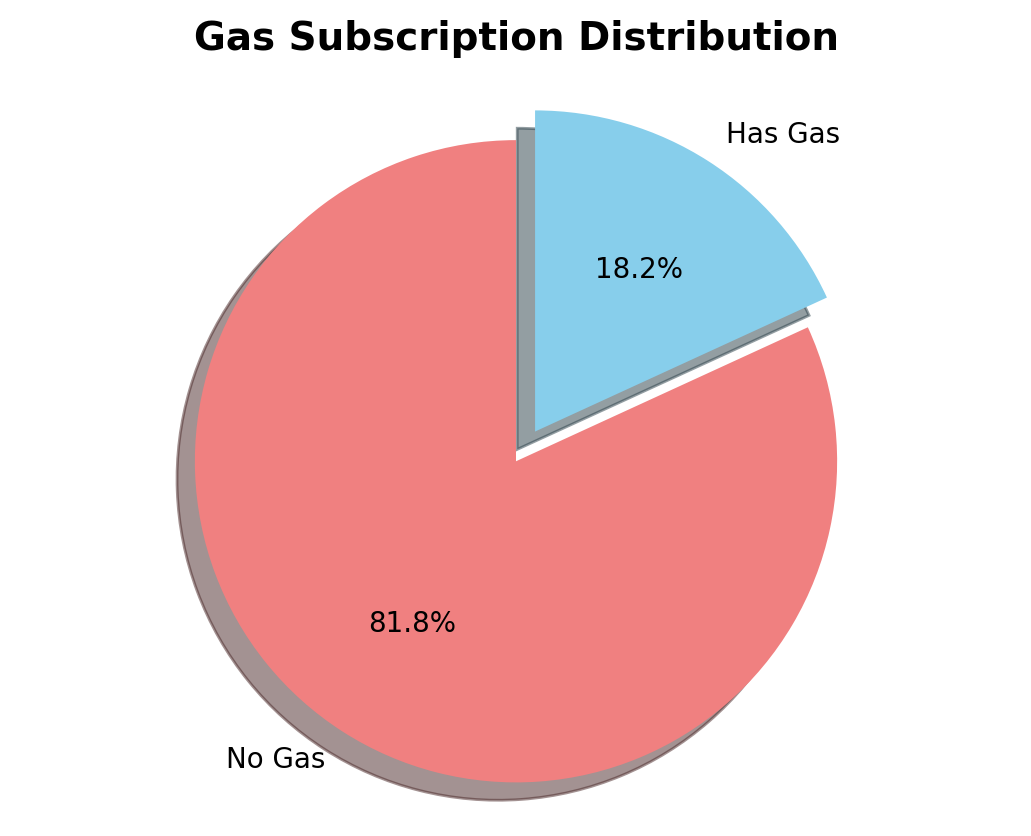

In [ ]:
fig, ax = plt.subplots()

# Create a pie chart
client_df.has_gas.value_counts().plot(
    kind='pie', 
    autopct='%1.1f%%',  # Add percentage labels
    startangle=90,  # Start at 90° for better readability
    ax=ax, 
    labels=["No Gas", "Has Gas"],  # Custom labels if `has_gas` is binary
    colors=["lightcoral", "skyblue"],
    shadow = True,
    explode = (0.01, 0.1)
)

# Set title and aspect ratio
ax.set_title("Gas Subscription Distribution")
ax.set_ylabel('')  # Remove default y-axis label for a cleaner look
ax.axis('equal');  # Equal aspect ratio to make the pie chart circular


In [ ]:
grouped_means = client_df.groupby('churn')[numeric_cols].mean()
grouped_means


,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
churn,,,,,,,,,,,,,,,,,,
0,167867.266550,30121.497308,17046.352089,1858.473333,1402.487601,0.938197,62.126588,0.137371,0.050019,43.108310,152.964184,23.929863,23.926979,1.295822,185.057407,5.037006,18.000339,0.0
1,78862.478506,9235.411557,7205.239605,1962.861938,1374.441860,1.231853,72.010937,0.136470,0.054873,43.332143,151.139331,30.468682,30.468682,1.260042,228.361938,4.633545,19.387827,1.0


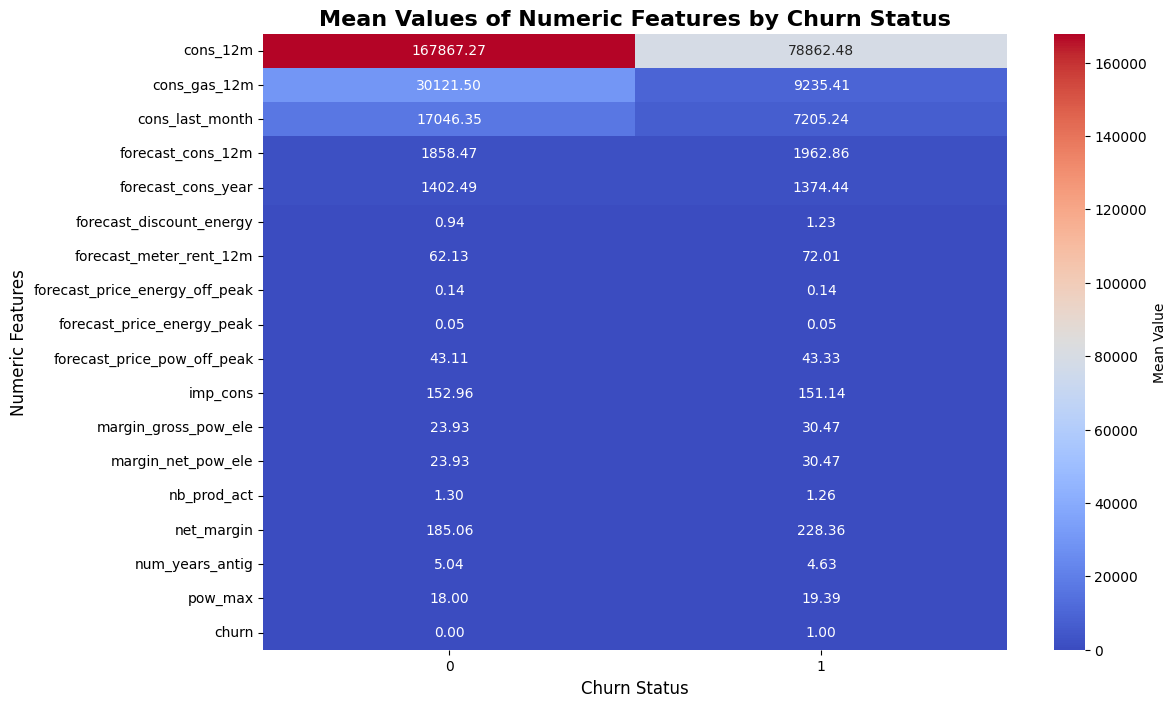

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(grouped_means.T, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Mean Value'})

# Customize plot
plt.title("Mean Values of Numeric Features by Churn Status", fontsize=16, fontweight='bold')
plt.xlabel("Churn Status", fontsize=12)
plt.ylabel("Numeric Features", fontsize=12)

# Rotate y-axis labels for readability
plt.yticks(rotation=0)
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Calculate differences (residuals) and percentage error
client_df_c = client_df.copy(deep = True)

client_df_c['electricity_residual'] = client_df_c['forecast_cons_12m'] - client_df_c['cons_12m']
client_df_c['electricity_percentage_error'] = (
    (client_df_c['forecast_cons_12m'] - client_df_c['cons_12m']) / client_df_c['cons_12m']
) * 100

# For gas (if applicable)
if 'cons_gas_12m' in client_df_c.columns and 'forecast_cons_12m' in client_df_c.columns:
    client_df_c['gas_residual'] = client_df_c['forecast_cons_12m'] - client_df_c['cons_gas_12m']
    client_df_c['gas_percentage_error'] = (
        (client_df_c['forecast_cons_12m'] - client_df_c['cons_gas_12m']) / client_df_c['cons_gas_12m']
    ) * 100


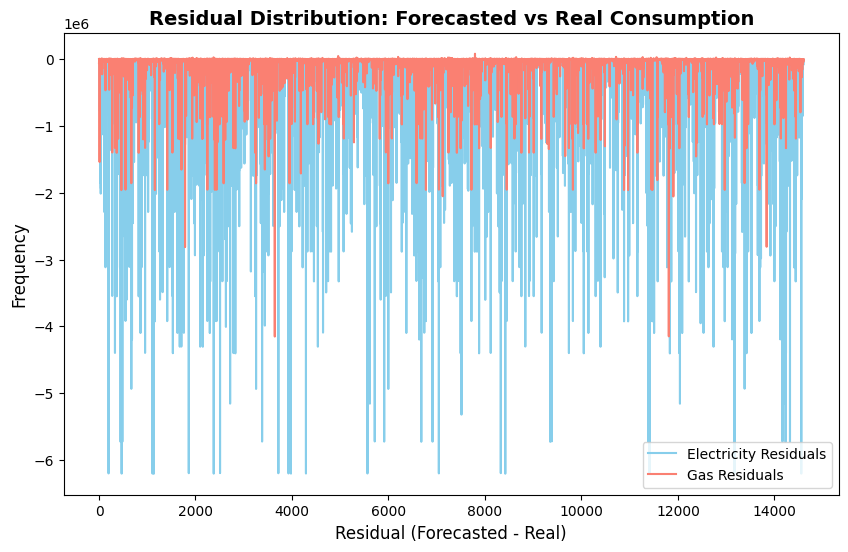

In [ ]:

plt.figure(figsize=(10, 6))
sns.lineplot(client_df_c['electricity_residual'], color="skyblue", label="Electricity Residuals")
if 'gas_residual' in client_df_c.columns:
    sns.lineplot(client_df_c['gas_residual'], color="salmon", label="Gas Residuals")

plt.title("Residual Distribution: Forecasted vs Real Consumption", fontsize=14, fontweight='bold')
plt.xlabel("Residual (Forecasted - Real)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend()
plt.show()


---
## _**Examining patterns with Timestamps**_

In [ ]:
# Extract year and month for temporal analysis
client_df['activation_year'] = client_df['date_activ'].dt.year
client_df['activation_month'] = client_df['date_activ'].dt.month


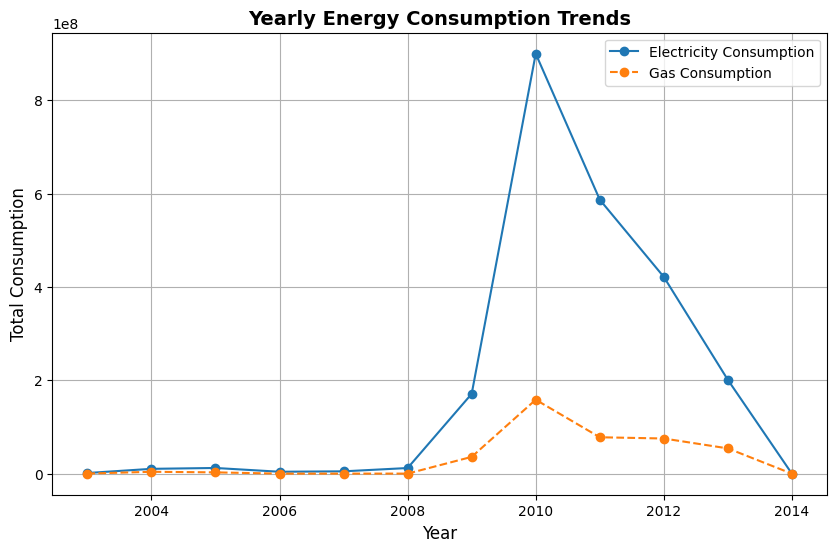

In [ ]:
# Aggregate yearly electricity and gas consumption
yearly_consumption = client_df.groupby('activation_year').agg(
    electricity_consumption=('cons_12m', 'sum'),
    gas_consumption=('cons_gas_12m', 'sum')
).reset_index()

# Plot yearly trends
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(yearly_consumption['activation_year'], yearly_consumption['electricity_consumption'], label='Electricity Consumption', marker='o')
plt.plot(yearly_consumption['activation_year'], yearly_consumption['gas_consumption'], label='Gas Consumption', marker='o', linestyle='--')
plt.title("Yearly Energy Consumption Trends", fontsize=14, fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Consumption", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


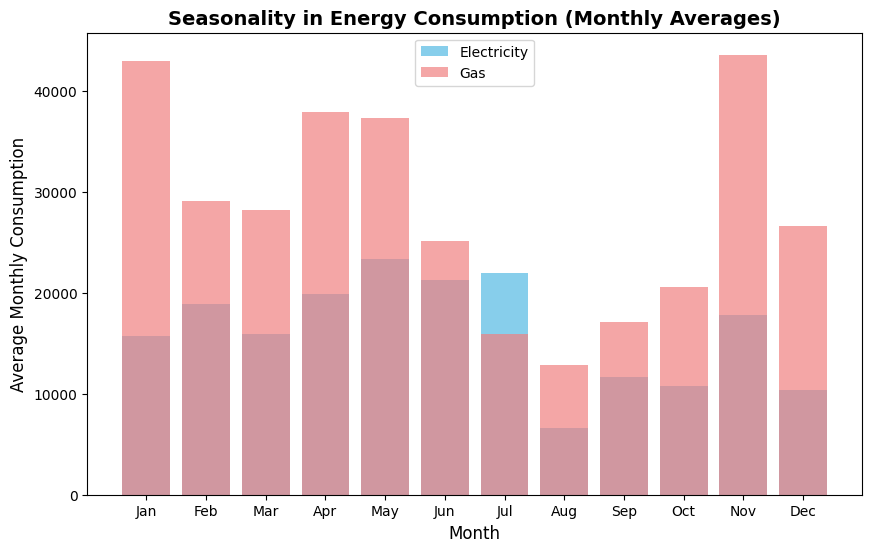

In [ ]:
# Aggregate monthly consumption
monthly_consumption = client_df.groupby('activation_month').agg(
    electricity_consumption=('cons_last_month', 'mean'),
    gas_consumption=('cons_gas_12m', 'mean')  # Use cons_gas_12m for gas, if available
).reset_index()

# Plot monthly seasonality
plt.figure(figsize=(10, 6))
plt.bar(monthly_consumption['activation_month'], monthly_consumption['electricity_consumption'], color='skyblue', label='Electricity')
plt.bar(monthly_consumption['activation_month'], monthly_consumption['gas_consumption'], color='lightcoral', alpha=0.7, label='Gas')

plt.title("Seasonality in Energy Consumption (Monthly Averages)", fontsize=14, fontweight='bold')
plt.xlabel("Month", fontsize=12)
plt.ylabel("Average Monthly Consumption", fontsize=12)
plt.xticks(ticks=range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend()
plt.show()


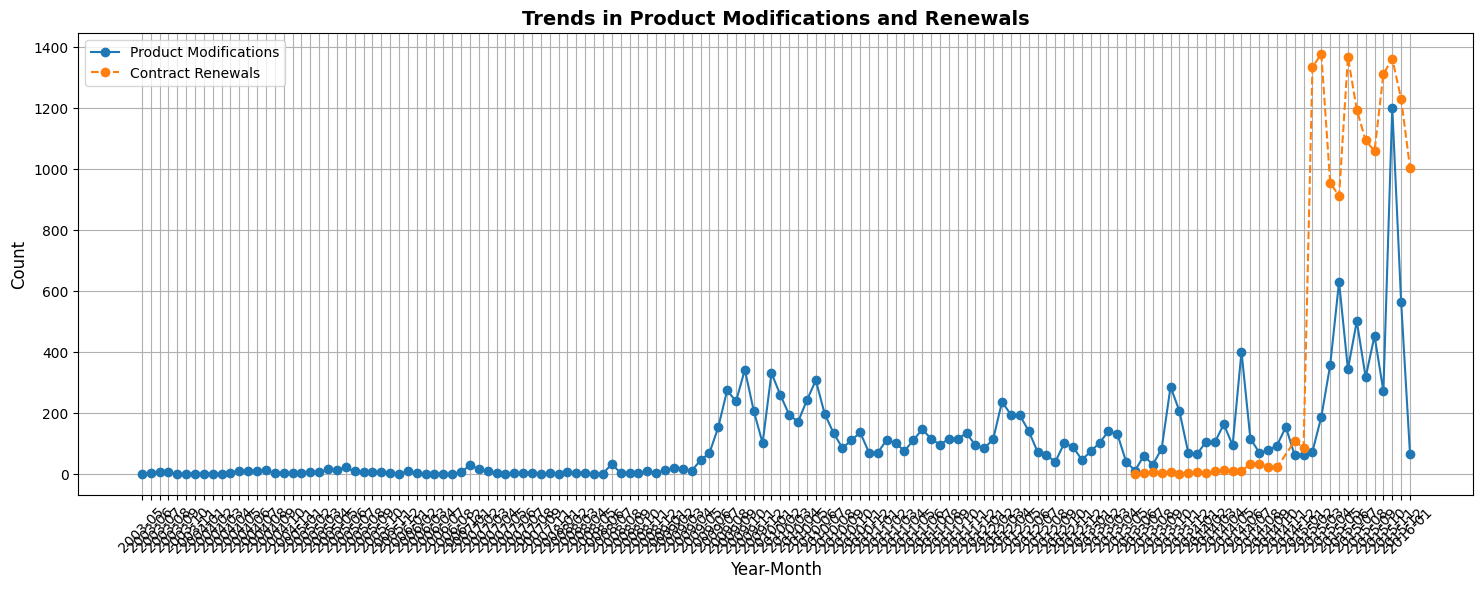

In [ ]:
# Extract year and month for product modifications and renewals
client_df['modif_year_month'] = client_df['date_modif_prod'].dt.to_period('M')
client_df['renewal_year_month'] = client_df['date_renewal'].dt.to_period('M')

# Count modifications and renewals over time
modif_trend = client_df['modif_year_month'].value_counts().sort_index()
renewal_trend = client_df['renewal_year_month'].value_counts().sort_index()

# Plot trends
plt.figure(figsize=(18, 6))
plt.plot(modif_trend.index.astype(str), modif_trend.values, label='Product Modifications', marker='o')
plt.plot(renewal_trend.index.astype(str), renewal_trend.values, label='Contract Renewals', marker='o', linestyle='--')

plt.title("Trends in Product Modifications and Renewals", fontsize=14, fontweight='bold')
plt.xlabel("Year-Month", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


---
## _**Detecting Outliers in Numeric Values**_

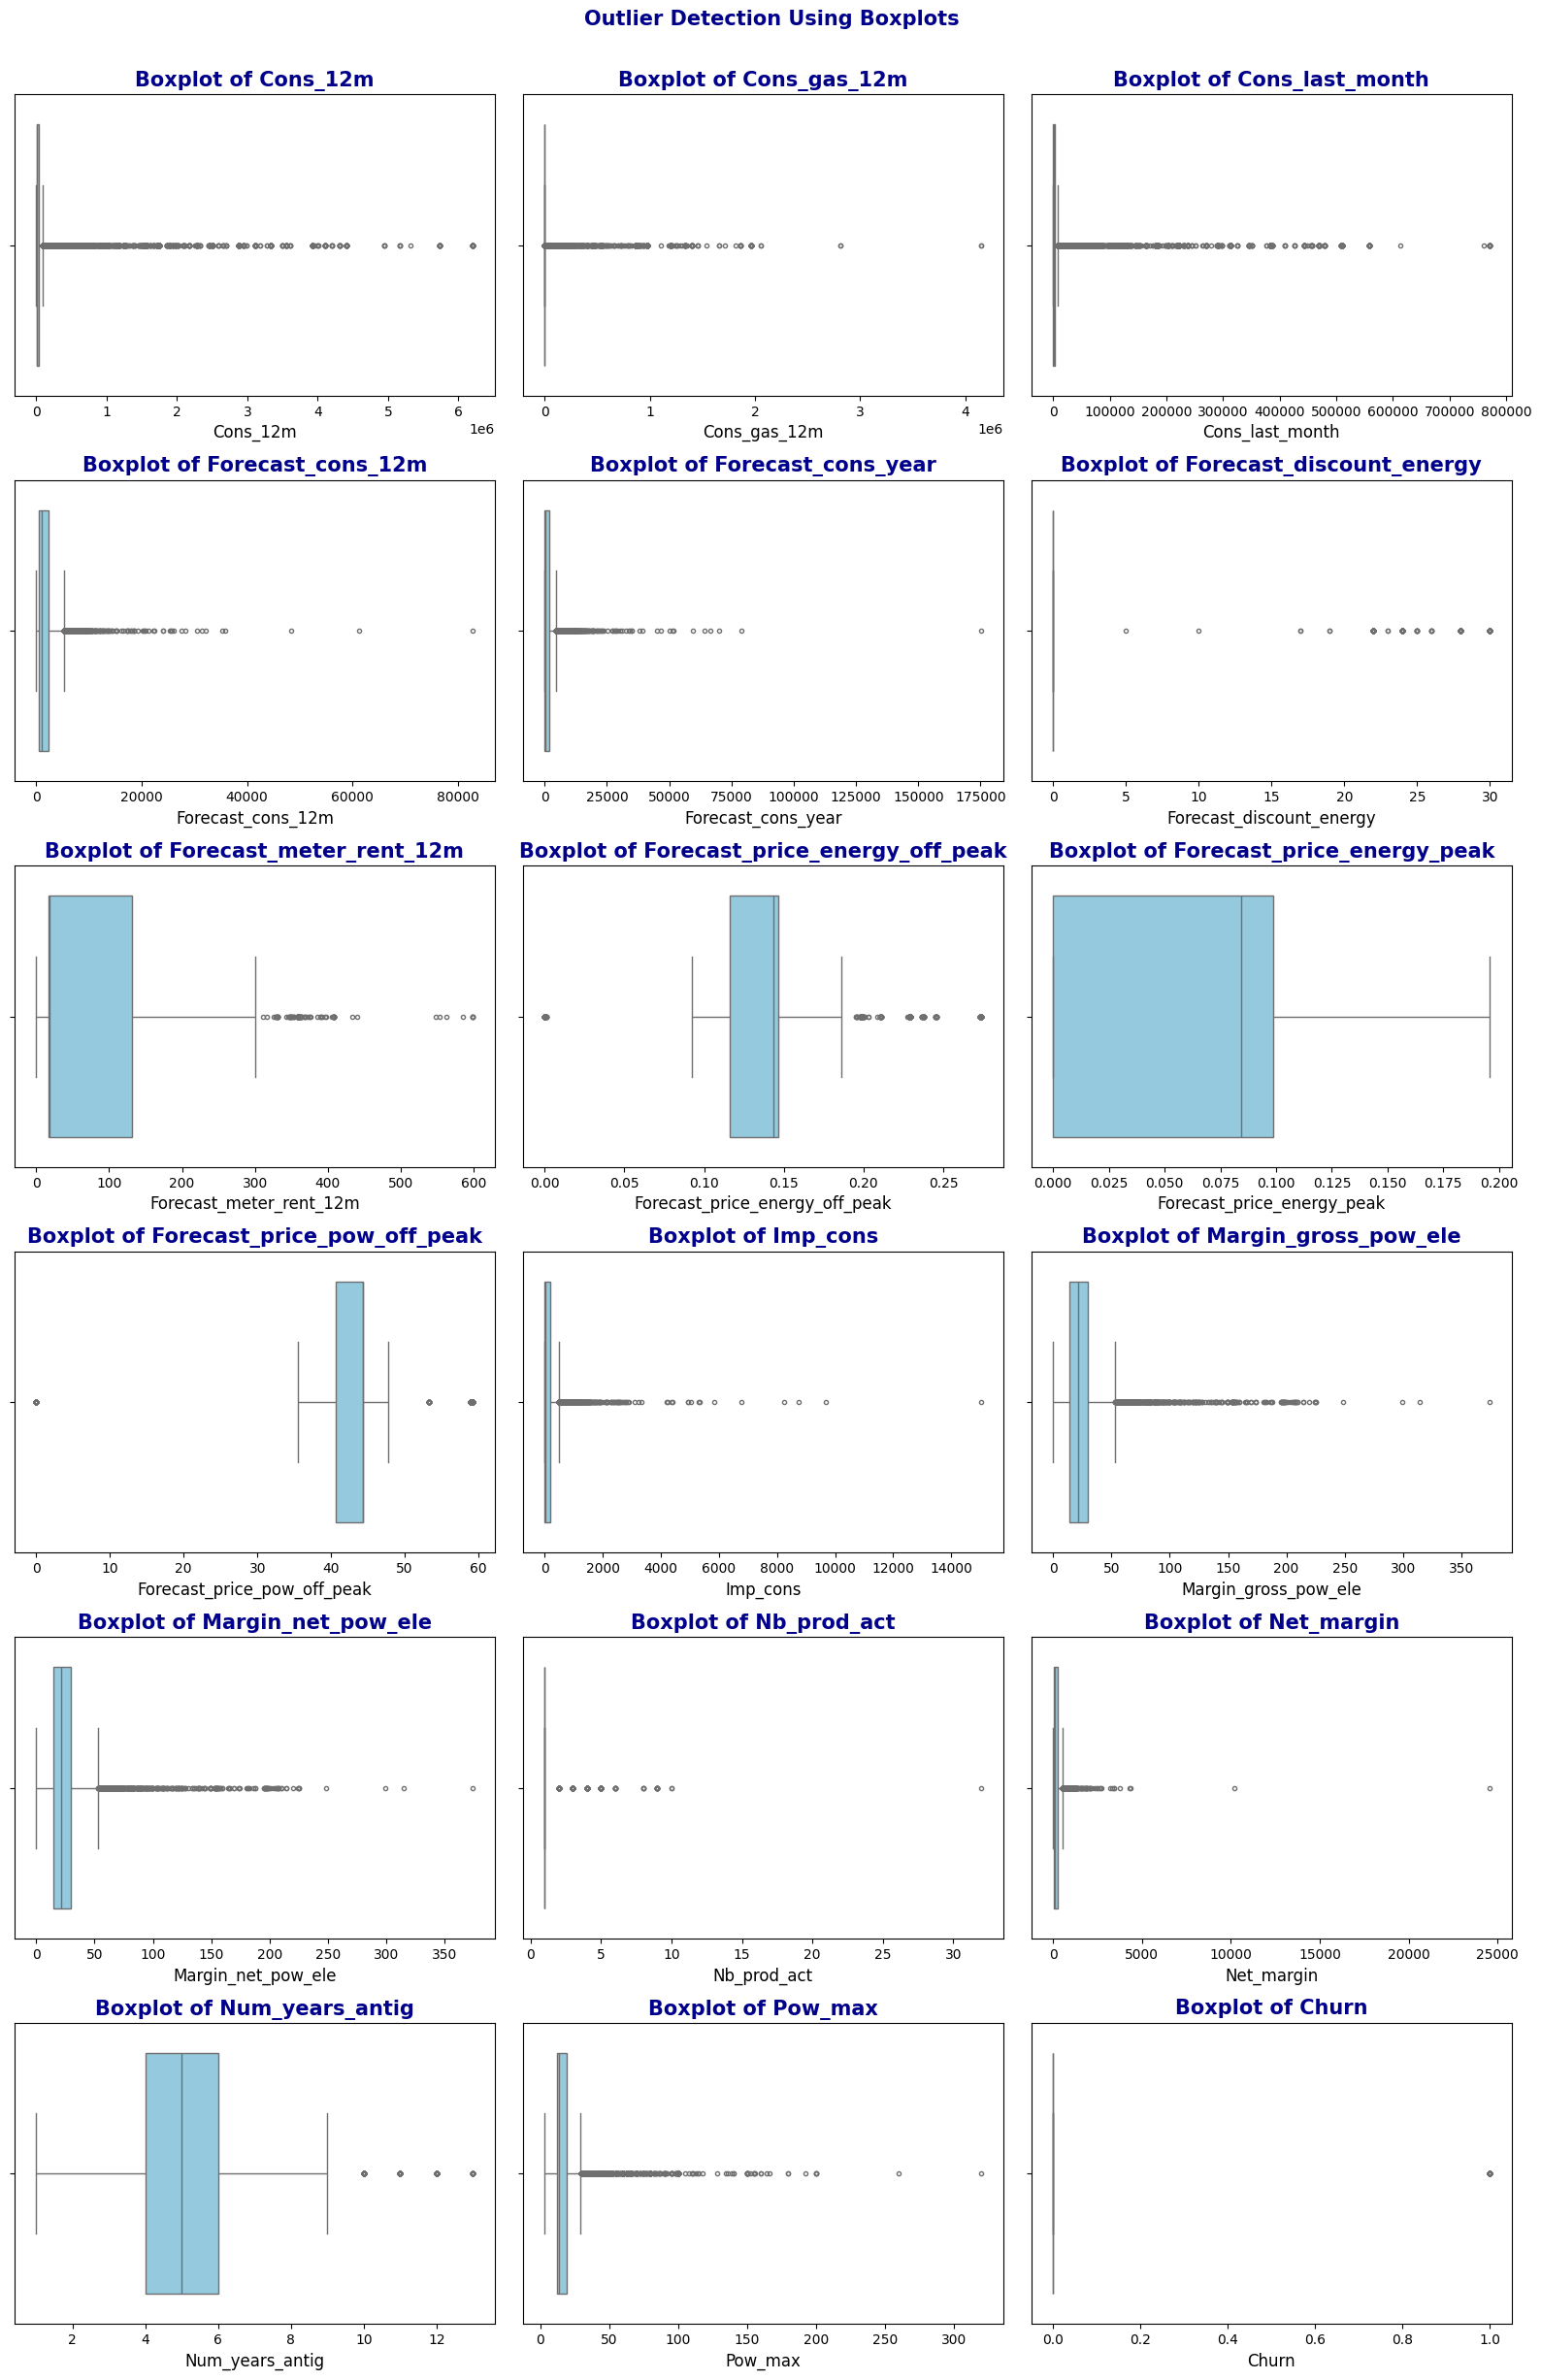

In [ ]:
# Set plot presets
plt_presets = dict(fontsize=15, fontweight='bold', color="darkblue")

# Create a figure for boxplots
fig, axs = plt.subplots(nrows=6, ncols=3, figsize=(16, 24))
axs = axs.flatten()

# Plot boxplots for numeric columns
for i, col in enumerate(numeric_cols):
    sns.boxplot(data=client_df, x=col, ax=axs[i], color='skyblue', fliersize=3)
    axs[i].set_title(f"Boxplot of {col.capitalize()}", **plt_presets)
    axs[i].set_xlabel(col.capitalize(), fontsize=12)

# Hide unused subplots
for j in range(len(numeric_cols), len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.suptitle("Outlier Detection Using Boxplots", y=1.02, **plt_presets)
plt.show()


---
# _**Churn Analysis**_


churn                          1.000000
margin_net_pow_ele             0.095772
margin_gross_pow_ele           0.095725
activation_year                0.075583
forecast_meter_rent_12m        0.044245
net_margin                     0.041135
pow_max                        0.030362
forecast_price_energy_peak     0.029315
forecast_discount_energy       0.017026
forecast_price_pow_off_peak    0.014778
Name: churn, dtype: float64


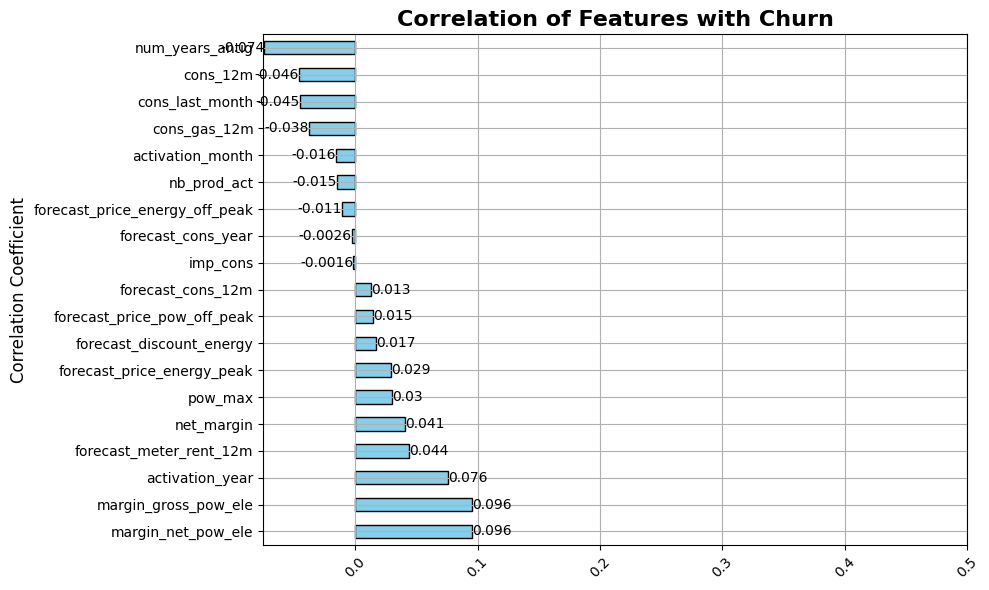

In [ ]:
# Calculate correlation with churn (binary column)
correlation_with_churn = client_df.corr(numeric_only=True)['churn'].sort_values(ascending=False)

# Display top predictors
print(correlation_with_churn.head(10))

# Visualize correlations
fig, ax = plt.subplots(figsize=(10, 6))
correlation_with_churn.drop('churn').plot(kind='barh', color='skyblue', edgecolor='black', ax = ax)
ax.set_title('Correlation of Features with Churn', fontsize=16, fontweight='bold')
ax.set_ylabel('Correlation Coefficient', fontsize=12)
ax.set_xlim(-0.075, 0.5)
ax.bar_label(ax.containers[0], fmt = "%.2g")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_12592\3424024174.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate_end = client_df.groupby('end_bucket')['churn'].mean()


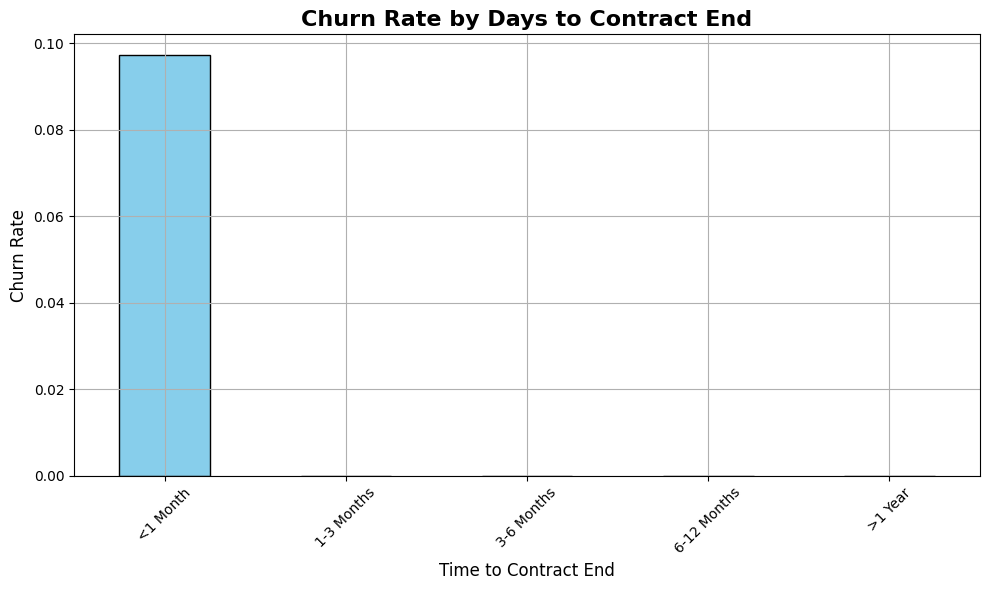

In [ ]:
# Calculate proximity to end or renewal date
client_df['days_to_end'] = (client_df['date_end'] - pd.to_datetime('today')).dt.days
client_df['days_to_renewal'] = (client_df['date_renewal'] - pd.to_datetime('today')).dt.days

# Churn rate by proximity buckets
client_df['end_bucket'] = pd.cut(client_df['days_to_end'], bins=[-float('inf'), 30, 90, 180, 365, float('inf')],
                                 labels=['<1 Month', '1-3 Months', '3-6 Months', '6-12 Months', '>1 Year'])

churn_rate_end = client_df.groupby('end_bucket')['churn'].mean()
churn_rate_end.plot(kind='bar', figsize=(10, 6), color='skyblue', edgecolor='black')
plt.title('Churn Rate by Days to Contract End', fontsize=16, fontweight='bold')
plt.xlabel('Time to Contract End', fontsize=12)
plt.ylabel('Churn Rate', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


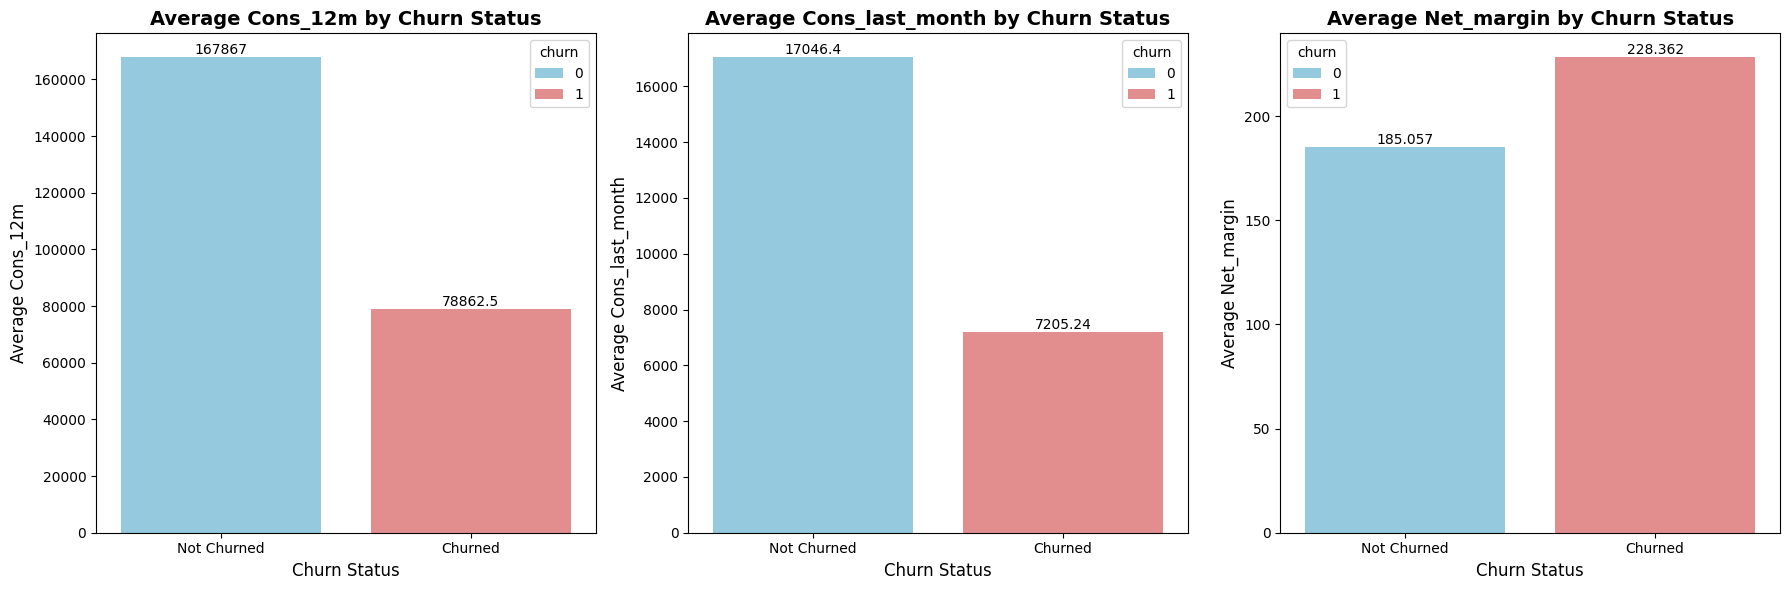

In [ ]:
# Mean comparison for consumption and profitability
behavioral_cols = ['cons_12m', 'cons_last_month', 'net_margin']
grouped_means = client_df.groupby('churn')[behavioral_cols].mean()

# Plot behavioral patterns
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, col in enumerate(behavioral_cols):
    sns.barplot(x=grouped_means.index, y=grouped_means[col], palette=['skyblue', 'lightcoral'], hue = grouped_means.index, ax=axes[i])
    axes[i].set_title(f'Average {col.capitalize()} by Churn Status', fontsize=14, fontweight='bold')
    axes[i].set_xlabel('Churn Status', fontsize=12)
    axes[i].set_ylabel(f'Average {col.capitalize()}', fontsize=12)
    axes[i].set_xticks([0, 1], ['Not Churned', 'Churned'])
    axes[i].bar_label(axes[i].containers[0])
    axes[i].bar_label(axes[i].containers[1])
    
plt.tight_layout()
plt.show()


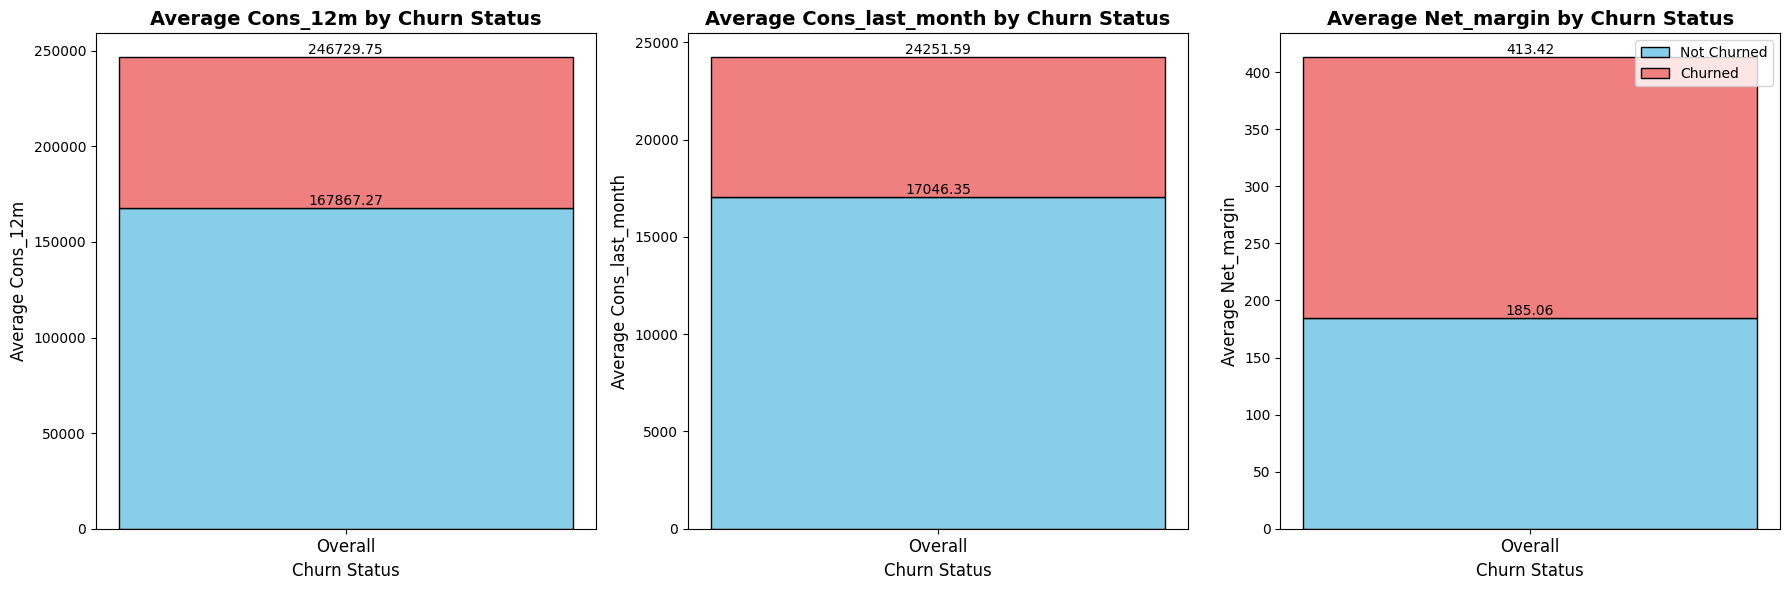

In [ ]:
# Plot behavioral patterns
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, col in enumerate(behavioral_cols):
    # Extract data for the bars
    not_churned = grouped_means.loc[0, col]
    churned = grouped_means.loc[1, col]
    
    # Define bar positions and widths
    bar_positions = np.arange(1)  # Single category (consumption/profitability)
    bar_width = 0.4
    
    # Plot stacked bars
    axes[i].bar(bar_positions, not_churned, color='skyblue', label='Not Churned', edgecolor='black')
    axes[i].bar(bar_positions, churned, bottom=not_churned, color='lightcoral', label='Churned', edgecolor='black')
    
    # Set title, labels, and ticks
    axes[i].set_title(f'Average {col.capitalize()} by Churn Status', fontsize=14, fontweight='bold')
    axes[i].set_xlabel('Churn Status', fontsize=12)
    axes[i].set_ylabel(f'Average {col.capitalize()}', fontsize=12)
    axes[i].set_xticks(bar_positions)
    axes[i].set_xticklabels(['Overall'], fontsize=12)
    
    # Add data labels
    axes[i].bar_label(axes[i].containers[0], fmt='%.2f')
    axes[i].bar_label(axes[i].containers[1], fmt='%.2f')
    
# fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=4, fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()


---
# _**Analysis for `price_data.csv`**_

In [ ]:
price_df.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 34.6 MB


In [ ]:
price_df['id'] = price_df['id'].astype('str')
price_df['price_date'] = pd.to_datetime(price_df['price_date'], errors = 'coerce')

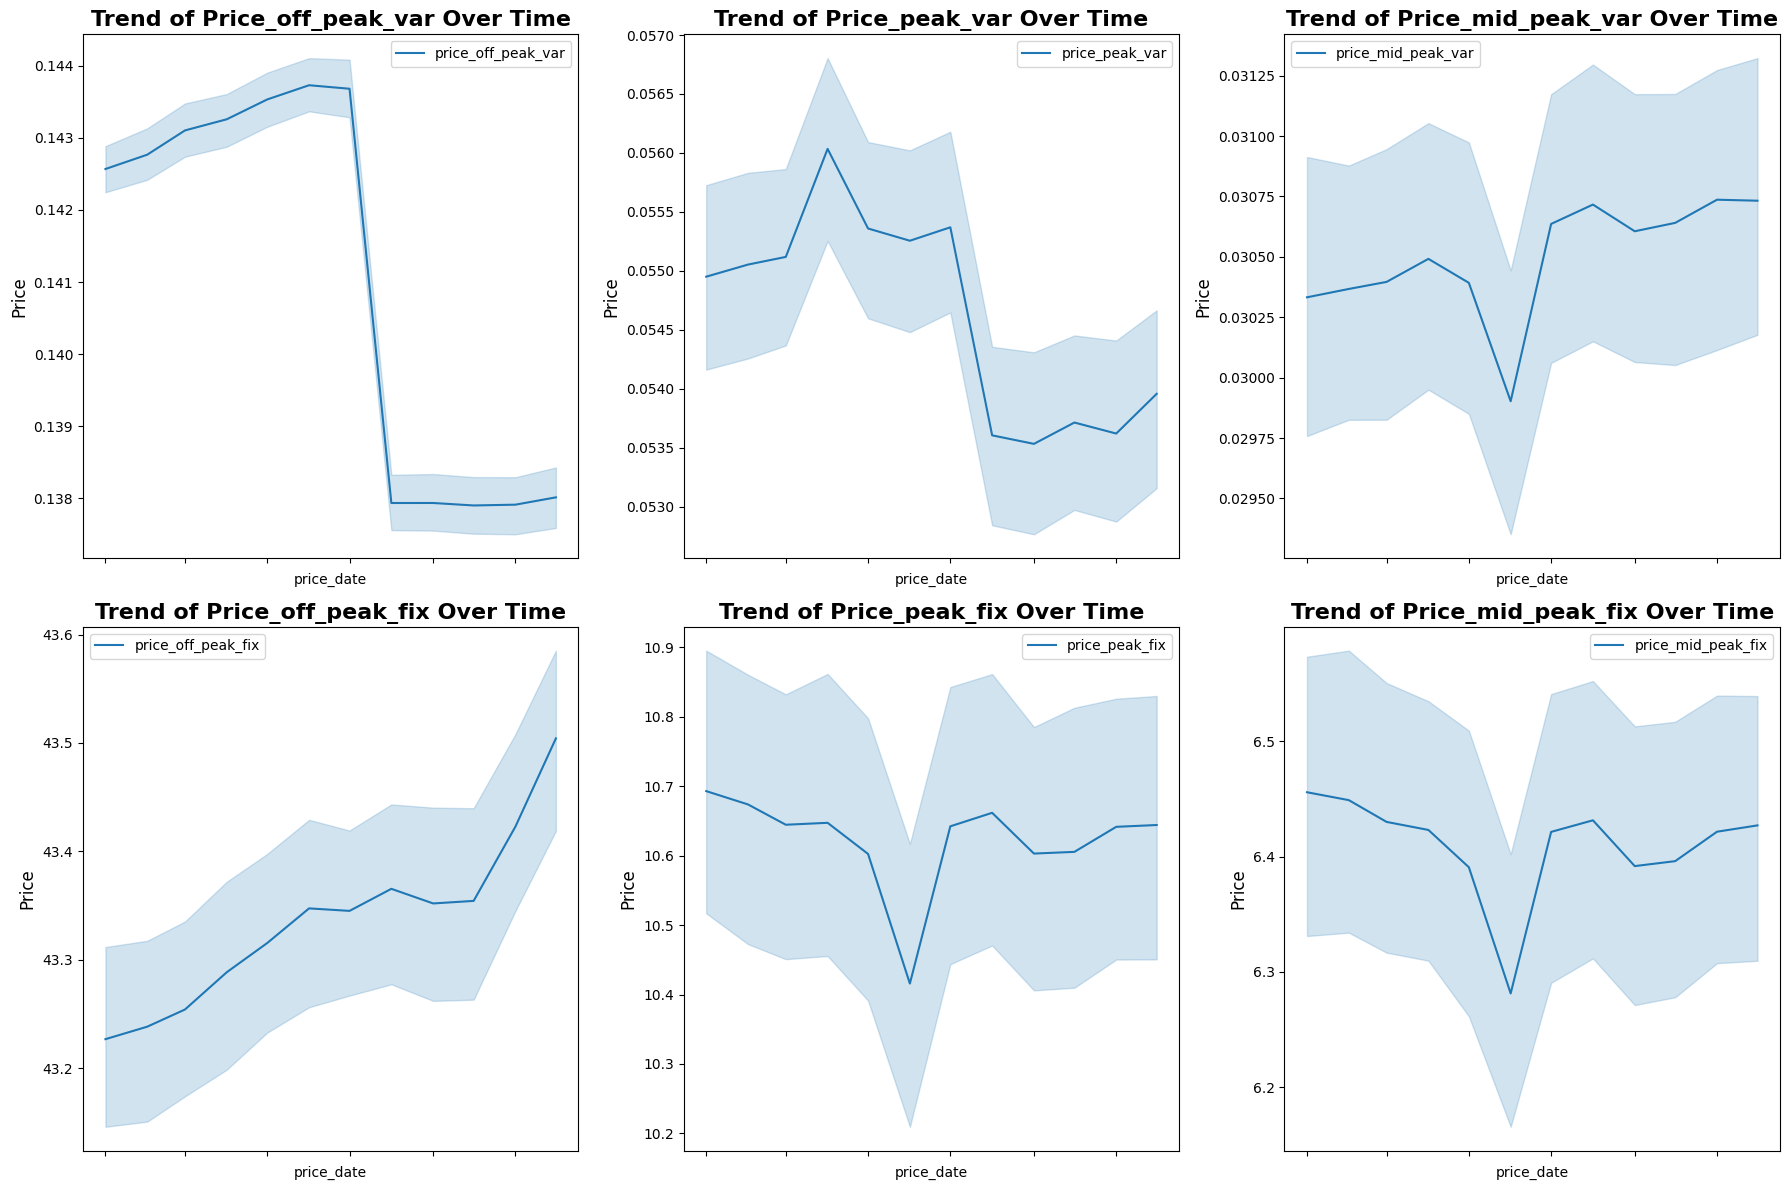

In [ ]:
price_cols = ['price_off_peak_var', 'price_peak_var', 'price_mid_peak_var',
              'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix']

fig, axes = plt.subplots(2, 3, figsize = (18, 12))

for i, ax in enumerate(axes.flatten()):
    sns.lineplot(data=price_df, x='price_date', y=price_cols[i], label=price_cols[i], ax = ax)
    ax.set_title(f'Trend of {price_cols[i].capitalize()} Over Time', fontsize=16, fontweight='bold')
    # ax.set_xlabel('Date', fontsize=12)
    ax.set_ylabel('Price', fontsize=12)
    ax.set_xticklabels('')

plt.tight_layout()
plt.show()
